In [1]:
import numpy as np
import seaborn
import pandas as pd
import importlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats

import sys
sys.path.append("../")
import bayseg

### Create 2-dimensional latent field

In [2]:
n = 30
m = 40

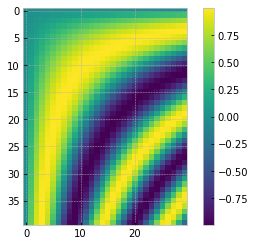

In [3]:
def func(x, y):
    return np.sin(y * x)

xaxis = np.linspace(0, 4, n)
yaxis = np.linspace(0, 4, m)
x, y = np.meshgrid(xaxis, yaxis)
result = func(x, y)

plt.imshow(result)
plt.colorbar()

In [4]:
latent_2d = np.zeros_like(result)

In [5]:
latent_2d[result > -0.5] = 1
latent_2d[result > 0.5] = 2
#latent_2d[0 >= result] = 1

In [6]:
np.unique(latent_2d)

array([ 0.,  1.,  2.])

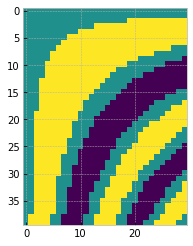

In [7]:
plt.imshow(latent_2d, interpolation="none")

### Sample

In [8]:
f = 4
c1 = scipy.stats.multivariate_normal([7.9, 7.5, 11, 3], np.eye(f) * 0.35)
c2 = scipy.stats.multivariate_normal([8, 7.9, 10.7, 2.9], np.eye(f) * 1.55)
c3 = scipy.stats.multivariate_normal([8.5, 9, 9, 1], np.eye(f) * 0.95)

In [9]:
obs = np.zeros((m,n,f))
np.shape(obs)

(40, 30, 4)

In [10]:
30*40

1200

In [11]:
latent_2d.shape

(40, 30)

In [12]:
for i, x in enumerate(latent_2d[:,0]):
    for j, y in enumerate(latent_2d[0,:]):
        # generate a 2-d random vector at each point
        if latent_2d[i, j] == 0:
            obs[i,j,:] = c1.rvs()
        elif latent_2d[i, j] == 1:
            obs[i,j,:] = c2.rvs()
        elif latent_2d[i, j] == 2:
            obs[i,j,:] = c3.rvs()

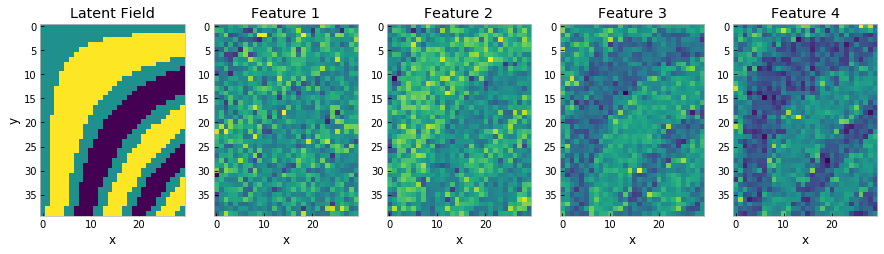

In [13]:
fig, ax = plt.subplots(ncols=5, figsize=(15,7))
for i in range(f+1):
    if i == 0:
        ax[i].imshow(latent_2d, interpolation="nearest")
        ax[i].set_ylabel("y")
        ax[i].set_title("Latent Field")
    else:
        ax[i].imshow(obs[:,:,i-1], interpolation="nearest")
        ax[i].set_title("Feature " + str(i))
    ax[i].grid(False)
    ax[i].set_xlabel("x")
    

### BaySeg initialization

In [14]:
np.shape(obs)

(40, 30, 4)

In [15]:
clf = bayseg.BaySeg(obs, 3, stamp=8)

In [16]:
clf.fit(50, verbose="energy")

  0%|                                                                                        | 0/50 [00:00<?, ?it/s]

likelihood energy: [[  8.00795293   1.88939891   0.17014581]
 [  6.74708387   1.51176087  -0.63706909]
 [  2.78836602   2.95819962   5.92906418]
 ..., 
 [  5.16950343   5.29793722  13.2906751 ]
 [  3.55356068   1.88561009   0.18513277]
 [  5.38456244   1.81989093  -0.52364498]]


GIBBS ENERGY
[[[ 3.  4.  5. ...,  5.  5.  3.]
  [ 5.  6.  6. ...,  5.  5.  3.]
  [ 5.  7.  8. ...,  3.  3.  2.]
  ..., 
  [ 4.  4.  3. ...,  0.  1.  1.]
  [ 3.  4.  2. ...,  1.  3.  2.]
  [ 1.  2.  0. ...,  1.  2.  2.]]

 [[ 1.  2.  3. ...,  0.  2.  1.]
  [ 3.  5.  5. ...,  3.  5.  3.]
  [ 1.  3.  1. ...,  5.  6.  4.]
  ..., 
  [ 3.  6.  5. ...,  8.  7.  4.]
  [ 2.  5.  6. ...,  8.  7.  5.]
  [ 3.  4.  5. ...,  5.  4.  2.]]

 [[ 2.  4.  2. ...,  5.  3.  2.]
  [ 2.  5.  5. ...,  8.  6.  4.]
  [ 4.  6.  7. ...,  8.  7.  4.]
  ..., 
  [ 3.  6.  8. ...,  8.  8.  5.]
  [ 5.  7.  8. ...,  7.  6.  3.]
  [ 2.  4.  5. ...,  4.  4.  2.]]]
gibbs energy: [[ 3.  4.  5.]
 [ 4.  4.  5.]
 [ 4.  4.  4.]
 ..., 
 [ 0.  1.  3.]
 

  2%|█▌                                                                              | 1/50 [00:00<00:19,  2.54it/s]

likelihood energy: [[  8.00428735   1.88935842   0.2477348 ]
 [  6.7452289    1.5150303   -0.62549716]
 [  2.79404311   2.95839212   5.92043092]
 ..., 
 [  5.20988961   5.31597076  13.32842285]
 [  3.5558755    1.89141004   0.20563499]
 [  5.38589384   1.82693446  -0.51836943]]


GIBBS ENERGY
[[[ 1.42502696  1.90003595  2.37504494 ...,  2.37504494  2.37504494
    1.42502696]
  [ 1.90003595  2.85005393  3.32506291 ...,  2.85005393  2.37504494
    1.42502696]
  [ 2.37504494  3.32506291  3.32506291 ...,  1.90003595  1.42502696
    0.95001798]
  ..., 
  [ 1.42502696  1.42502696  1.42502696 ...,  0.95001798  0.47500899
    0.47500899]
  [ 1.42502696  2.37504494  1.42502696 ...,  1.42502696  1.42502696
    0.95001798]
  [ 0.47500899  1.42502696  0.         ...,  0.95001798  0.95001798
    0.95001798]]

 [[ 0.47500899  0.95001798  1.42502696 ...,  0.47500899  1.42502696
    0.47500899]
  [ 1.42502696  1.90003595  1.90003595 ...,  0.95001798  2.85005393
    1.42502696]
  [ 0.47500899  0.950017

    0.95001798]]]
MU acceptance ratio: 0.305155465157
MU acceptance ratio: 0.704047578183
MU acceptance ratio: 0.718923476106
COV acceptance ratio: 1.03027618386
COV acceptance ratio: 0.945795397349
COV acceptance ratio: 0.974093927511


GIBBS ENERGY
[[[  2.87221976   4.30832964   5.74443952 ...,   7.1805494    7.1805494
     4.30832964]
  [  5.74443952   8.61665927   7.1805494  ...,   7.1805494    7.1805494
     4.30832964]
  [  5.74443952   8.61665927  10.05276915 ...,   4.30832964   4.30832964
     2.87221976]
  ..., 
  [  5.74443952   7.1805494    5.74443952 ...,   1.43610988   1.43610988
     1.43610988]
  [  4.30832964   7.1805494    2.87221976 ...,   1.43610988   4.30832964
     2.87221976]
  [  1.43610988   4.30832964   1.43610988 ...,   1.43610988   2.87221976
     2.87221976]]

 [[  2.87221976   4.30832964   4.30832964 ...,   1.43610988   4.30832964
     1.43610988]
  [  5.74443952   7.1805494    7.1805494  ...,   4.30832964   8.61665927
     4.30832964]
  [  2.87221976   5.7

  4%|███▏                                                                            | 2/50 [00:00<00:18,  2.54it/s]

likelihood energy: [[  7.76011609   1.89489712   0.15439928]
 [  6.51928825   1.52100801  -0.70731337]
 [  2.66039344   2.99329062   5.9783989 ]
 ..., 
 [  5.22878501   5.31747298  13.83991826]
 [  3.43101702   1.89639237   0.30449026]
 [  5.22482827   1.82607206  -0.45325004]]


GIBBS ENERGY
[[[ 0.95001798  1.42502696  1.90003595 ...,  2.37504494  2.37504494
    1.42502696]
  [ 1.90003595  2.85005393  2.37504494 ...,  2.37504494  2.37504494
    1.42502696]
  [ 1.90003595  2.85005393  3.32506291 ...,  1.42502696  1.42502696
    0.95001798]
  ..., 
  [ 1.90003595  2.37504494  1.90003595 ...,  0.47500899  0.47500899
    0.47500899]
  [ 1.42502696  2.37504494  0.95001798 ...,  0.47500899  1.42502696
    0.95001798]
  [ 0.47500899  1.42502696  0.47500899 ...,  0.47500899  0.95001798
    0.95001798]]

 [[ 0.95001798  1.42502696  1.42502696 ...,  0.47500899  1.42502696
    0.47500899]
  [ 1.90003595  2.37504494  2.37504494 ...,  1.42502696  2.85005393
    1.42502696]
  [ 0.95001798  1.900035

    0.95001798]]]
MU acceptance ratio: 0.514719905685
MU acceptance ratio: 1.28997917778
MU acceptance ratio: 1.10529667554
COV acceptance ratio: 1.0442274803
COV acceptance ratio: 0.935158408142
COV acceptance ratio: 0.840102393977


GIBBS ENERGY
[[[-0.20068138 -0.26757518 -0.33446897 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.40136277 -0.33446897 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.46825656 -0.46825656 ..., -0.33446897 -0.33446897
   -0.20068138]
  ..., 
  [-0.26757518 -0.26757518 -0.20068138 ..., -0.         -0.13378759
   -0.06689379]
  [-0.20068138 -0.26757518 -0.13378759 ..., -0.06689379 -0.26757518
   -0.20068138]
  [-0.06689379 -0.13378759 -0.         ..., -0.06689379 -0.13378759
   -0.13378759]]

 [[-0.06689379 -0.13378759 -0.13378759 ..., -0.         -0.06689379 -0.        ]
  [-0.20068138 -0.33446897 -0.33446897 ..., -0.20068138 -0.26757518
   -0.20068138]
  [-0.06689379 -0.26757518 -0.20068138 ..., -0.20068138 -0.20068138
   -0

  6%|████▊                                                                           | 3/50 [00:01<00:18,  2.53it/s]

likelihood energy: [[  7.79476155   1.91981402   0.08325397]
 [  6.54598816   1.54142164  -0.72917173]
 [  2.6600926    3.0196407    5.84158705]
 ..., 
 [  5.27908639   5.31734596  13.57309708]
 [  3.44229751   1.89604266   0.20439718]
 [  5.24820571   1.81469512  -0.50411714]]


GIBBS ENERGY
[[[-0.20068138 -0.26757518 -0.33446897 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.40136277 -0.33446897 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.46825656 -0.46825656 ..., -0.33446897 -0.33446897
   -0.20068138]
  ..., 
  [-0.26757518 -0.26757518 -0.20068138 ..., -0.         -0.13378759
   -0.06689379]
  [-0.20068138 -0.26757518 -0.13378759 ..., -0.06689379 -0.26757518
   -0.20068138]
  [-0.06689379 -0.13378759 -0.         ..., -0.06689379 -0.13378759
   -0.13378759]]

 [[-0.06689379 -0.13378759 -0.13378759 ..., -0.         -0.06689379 -0.        ]
  [-0.20068138 -0.33446897 -0.33446897 ..., -0.20068138 -0.26757518
   -0.20068138]
  [-0.06689379 -0.26757518 

   -0.13378759]]]
MU acceptance ratio: 0.54037652225
MU acceptance ratio: 2.25298052809
MU acceptance ratio: 0.80519052462
COV acceptance ratio: 1.05075774845
COV acceptance ratio: 0.848556462651
COV acceptance ratio: 0.984924716154


GIBBS ENERGY
[[[ -4.59023471  -7.65039118  -7.65039118 ...,  -6.12031294  -6.12031294
    -3.06015647]
  [ -7.65039118 -10.71054765 -10.71054765 ...,  -6.12031294  -7.65039118
    -3.06015647]
  [ -7.65039118  -9.18046941 -10.71054765 ...,  -4.59023471  -3.06015647
    -1.53007824]
  ..., 
  [ -6.12031294  -6.12031294  -3.06015647 ...,  -4.59023471  -3.06015647
    -1.53007824]
  [ -4.59023471  -6.12031294  -1.53007824 ...,  -3.06015647  -4.59023471
    -3.06015647]
  [ -1.53007824  -3.06015647  -0.         ...,  -1.53007824  -3.06015647
    -3.06015647]]

 [[ -1.53007824  -3.06015647  -6.12031294 ...,  -1.53007824  -3.06015647
    -3.06015647]
  [ -3.06015647  -6.12031294  -6.12031294 ...,  -6.12031294  -6.12031294
    -4.59023471]
  [ -1.53007824  -6.12

  8%|██████▍                                                                         | 4/50 [00:01<00:18,  2.45it/s]

likelihood energy: [[  7.84755383   1.94388498   0.14628552]
 [  6.57551389   1.55915888  -0.63886936]
 [  2.59924427   3.00847549   5.67500257]
 ..., 
 [  5.4016081    5.280199    12.84158319]
 [  3.50405018   1.89183462   0.07811228]
 [  5.35014539   1.81653216  -0.53169256]]


GIBBS ENERGY
[[[-0.20068138 -0.33446897 -0.33446897 ..., -0.26757518 -0.26757518
   -0.13378759]
  [-0.33446897 -0.46825656 -0.46825656 ..., -0.26757518 -0.33446897
   -0.13378759]
  [-0.33446897 -0.40136277 -0.46825656 ..., -0.20068138 -0.13378759
   -0.06689379]
  ..., 
  [-0.26757518 -0.26757518 -0.13378759 ..., -0.20068138 -0.13378759
   -0.06689379]
  [-0.20068138 -0.26757518 -0.06689379 ..., -0.13378759 -0.20068138
   -0.13378759]
  [-0.06689379 -0.13378759 -0.         ..., -0.06689379 -0.13378759
   -0.13378759]]

 [[-0.06689379 -0.13378759 -0.26757518 ..., -0.06689379 -0.13378759
   -0.13378759]
  [-0.13378759 -0.26757518 -0.26757518 ..., -0.26757518 -0.26757518
   -0.20068138]
  [-0.06689379 -0.267575

   -0.20068138]]]
MU acceptance ratio: 0.466158460032
MU acceptance ratio: 0.748351810291
MU acceptance ratio: 1.19491656452
COV acceptance ratio: 1.07646127616
COV acceptance ratio: 0.769800738684
COV acceptance ratio: 0.95988901962


GIBBS ENERGY
[[[-13.90302931 -23.17171552 -23.17171552 ..., -23.17171552 -23.17171552
   -13.90302931]
  [-23.17171552 -32.44040172 -32.44040172 ..., -23.17171552 -23.17171552
   -13.90302931]
  [-23.17171552 -32.44040172 -37.07474483 ..., -18.53737241 -13.90302931
    -9.26868621]
  ..., 
  [-18.53737241 -18.53737241 -13.90302931 ...,  -0.          -9.26868621
    -9.26868621]
  [-13.90302931 -18.53737241  -9.26868621 ...,  -4.6343431  -13.90302931
    -9.26868621]
  [ -4.6343431   -9.26868621  -0.         ...,  -4.6343431   -9.26868621
    -9.26868621]]

 [[ -4.6343431   -4.6343431  -13.90302931 ...,  -0.          -9.26868621
    -4.6343431 ]
  [ -9.26868621 -13.90302931 -18.53737241 ..., -13.90302931 -23.17171552
   -13.90302931]
  [ -4.6343431   -9.2

 10%|████████                                                                        | 5/50 [00:02<00:18,  2.46it/s]

likelihood energy: [[  7.85433467   1.95024545   0.1302012 ]
 [  6.5833994    1.56129068  -0.662622  ]
 [  2.59808469   3.04136012   5.69553477]
 ..., 
 [  5.36438802   5.30638981  13.22967563]
 [  3.48841143   1.90358614   0.07211248]
 [  5.33836912   1.82009455  -0.59022508]]


GIBBS ENERGY
[[[-0.20068138 -0.33446897 -0.33446897 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.46825656 -0.46825656 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.46825656 -0.53515036 ..., -0.26757518 -0.20068138
   -0.13378759]
  ..., 
  [-0.26757518 -0.26757518 -0.20068138 ..., -0.         -0.13378759
   -0.13378759]
  [-0.20068138 -0.26757518 -0.13378759 ..., -0.06689379 -0.20068138
   -0.13378759]
  [-0.06689379 -0.13378759 -0.         ..., -0.06689379 -0.13378759
   -0.13378759]]

 [[-0.06689379 -0.06689379 -0.20068138 ..., -0.         -0.13378759
   -0.06689379]
  [-0.13378759 -0.20068138 -0.26757518 ..., -0.20068138 -0.33446897
   -0.20068138]
  [-0.06689379 -0.133787

   -0.13378759]]]
MU acceptance ratio: 0.145314124908
MU acceptance ratio: 0.950316299909
MU acceptance ratio: 0.325501271756
COV acceptance ratio: 0.923896925692
COV acceptance ratio: 1.01077722065
COV acceptance ratio: 0.947790137478


GIBBS ENERGY
[[[ -5.97832639  -9.96387732  -9.96387732 ...,  -9.96387732  -7.97110186
    -3.98555093]
  [ -9.96387732 -13.94942825 -13.94942825 ...,  -9.96387732  -7.97110186
    -5.97832639]
  [ -9.96387732 -13.94942825 -15.94220372 ...,  -5.97832639  -3.98555093
    -1.99277546]
  ..., 
  [ -7.97110186  -7.97110186  -5.97832639 ...,  -1.99277546  -3.98555093
    -1.99277546]
  [ -5.97832639  -7.97110186  -3.98555093 ...,  -5.97832639  -9.96387732
    -3.98555093]
  [ -1.99277546  -3.98555093  -0.         ...,  -1.99277546  -5.97832639
    -3.98555093]]

 [[ -1.99277546  -3.98555093  -5.97832639 ...,  -1.99277546  -5.97832639
    -1.99277546]
  [ -3.98555093  -7.97110186  -5.97832639 ...,  -5.97832639 -11.95665279
    -5.97832639]
  [ -1.99277546  -5

 12%|█████████▌                                                                      | 6/50 [00:02<00:17,  2.46it/s]

likelihood energy: [[  7.7296368    1.95409767   0.15584584]
 [  6.45706697   1.56869107  -0.64260595]
 [  2.59963814   3.06284629   5.68661095]
 ..., 
 [  5.37718611   5.28244222  13.08239037]
 [  3.40699752   1.90793883   0.0711611 ]
 [  5.21647271   1.82059551  -0.58570547]]


GIBBS ENERGY
[[[-0.20068138 -0.33446897 -0.33446897 ..., -0.33446897 -0.26757518
   -0.13378759]
  [-0.33446897 -0.46825656 -0.46825656 ..., -0.33446897 -0.26757518
   -0.20068138]
  [-0.33446897 -0.46825656 -0.53515036 ..., -0.20068138 -0.13378759
   -0.06689379]
  ..., 
  [-0.26757518 -0.26757518 -0.20068138 ..., -0.06689379 -0.13378759
   -0.06689379]
  [-0.20068138 -0.26757518 -0.13378759 ..., -0.20068138 -0.33446897
   -0.13378759]
  [-0.06689379 -0.13378759 -0.         ..., -0.06689379 -0.20068138
   -0.13378759]]

 [[-0.06689379 -0.13378759 -0.20068138 ..., -0.06689379 -0.20068138
   -0.06689379]
  [-0.13378759 -0.26757518 -0.20068138 ..., -0.20068138 -0.40136277
   -0.20068138]
  [-0.06689379 -0.200681

   -0.13378759]]]
MU acceptance ratio: 1.09901890093
MU acceptance ratio: 1.01058459638
MU acceptance ratio: 0.884319735358
COV acceptance ratio: 0.956600735366
COV acceptance ratio: 1.18308151019
COV acceptance ratio: 1.05810960872


GIBBS ENERGY
[[[-0.57427305 -0.7656974  -0.95712175 ..., -0.95712175 -0.95712175
   -0.57427305]
  [-0.95712175 -1.1485461  -1.1485461  ..., -0.95712175 -0.95712175
   -0.57427305]
  [-0.95712175 -1.33997045 -1.5313948  ..., -0.95712175 -0.7656974
   -0.3828487 ]
  ..., 
  [-0.7656974  -0.7656974  -0.3828487  ..., -0.3828487  -0.3828487
   -0.57427305]
  [-0.57427305 -0.7656974  -0.19142435 ..., -0.57427305 -0.95712175
   -0.57427305]
  [-0.19142435 -0.3828487  -0.         ..., -0.19142435 -0.57427305
   -0.3828487 ]]

 [[-0.19142435 -0.3828487  -0.57427305 ..., -0.         -0.3828487
   -0.19142435]
  [-0.57427305 -0.95712175 -0.95712175 ..., -0.57427305 -0.95712175
   -0.57427305]
  [-0.         -0.57427305 -0.57427305 ..., -0.57427305 -0.95712175
   -0

 14%|███████████▏                                                                    | 7/50 [00:02<00:17,  2.45it/s]

likelihood energy: [[  7.73937118   1.96516221   0.15110702]
 [  6.46138226   1.57384488  -0.64749091]
 [  2.68386769   3.05072994   5.68876606]
 ..., 
 [  5.40173505   5.28569703  13.16437043]
 [  3.42236882   1.91117864   0.06541029]
 [  5.21102621   1.82401327  -0.59445603]]


GIBBS ENERGY
[[[-0.20068138 -0.26757518 -0.33446897 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.40136277 -0.40136277 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.46825656 -0.53515036 ..., -0.33446897 -0.26757518
   -0.13378759]
  ..., 
  [-0.26757518 -0.26757518 -0.13378759 ..., -0.13378759 -0.13378759
   -0.20068138]
  [-0.20068138 -0.26757518 -0.06689379 ..., -0.20068138 -0.33446897
   -0.20068138]
  [-0.06689379 -0.13378759 -0.         ..., -0.06689379 -0.20068138
   -0.13378759]]

 [[-0.06689379 -0.13378759 -0.20068138 ..., -0.         -0.13378759
   -0.06689379]
  [-0.20068138 -0.33446897 -0.33446897 ..., -0.20068138 -0.33446897
   -0.20068138]
  [-0.         -0.200681

   -0.13378759]]]
MU acceptance ratio: 1.4967675695
MU acceptance ratio: 0.592267298272
MU acceptance ratio: 0.520482589625
COV acceptance ratio: 0.871957777675
COV acceptance ratio: 1.09116900413
COV acceptance ratio: 0.980239694244


GIBBS ENERGY
[[[ 1.30211706  1.73615608  2.1701951  ...,  2.1701951   2.1701951
    1.30211706]
  [ 2.1701951   2.60423412  2.60423412 ...,  2.1701951   2.1701951
    1.30211706]
  [ 2.1701951   3.03827314  3.47231216 ...,  1.73615608  1.73615608
    1.30211706]
  ..., 
  [ 1.73615608  1.73615608  1.30211706 ...,  0.43403902  0.43403902
    0.43403902]
  [ 1.30211706  1.73615608  0.86807804 ...,  0.86807804  1.73615608
    0.86807804]
  [ 0.43403902  0.86807804  0.43403902 ...,  0.43403902  1.30211706
    0.86807804]]

 [[ 0.43403902  0.86807804  1.30211706 ...,  0.43403902  0.86807804  0.        ]
  [ 0.86807804  1.73615608  2.1701951  ...,  1.30211706  2.1701951
    1.30211706]
  [ 0.43403902  1.30211706  1.30211706 ...,  2.1701951   2.1701951
    0.86

 16%|████████████▊                                                                   | 8/50 [00:03<00:17,  2.46it/s]

likelihood energy: [[  7.79736635e+00   1.96831502e+00   8.33652675e-02]
 [  6.52568373e+00   1.58020855e+00  -6.79256692e-01]
 [  2.70265075e+00   3.08836205e+00   5.58222700e+00]
 ..., 
 [  5.38137107e+00   5.24364803e+00   1.30779909e+01]
 [  3.44768982e+00   1.89442377e+00   2.65356545e-04]
 [  5.25831661e+00   1.79482671e+00  -6.12976771e-01]]


GIBBS ENERGY
[[[-0.20068138 -0.26757518 -0.33446897 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.40136277 -0.40136277 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.46825656 -0.53515036 ..., -0.26757518 -0.26757518
   -0.20068138]
  ..., 
  [-0.26757518 -0.26757518 -0.20068138 ..., -0.06689379 -0.06689379
   -0.06689379]
  [-0.20068138 -0.26757518 -0.13378759 ..., -0.13378759 -0.26757518
   -0.13378759]
  [-0.06689379 -0.13378759 -0.06689379 ..., -0.06689379 -0.20068138
   -0.13378759]]

 [[-0.06689379 -0.13378759 -0.20068138 ..., -0.06689379 -0.13378759 -0.        ]
  [-0.13378759 -0.26757518 -0.33446897 

   -0.13378759]]]
MU acceptance ratio: 4.49979036947
MU acceptance ratio: 1.4958116025
MU acceptance ratio: 0.552210611792
COV acceptance ratio: 0.93479837643
COV acceptance ratio: 1.0339763022
COV acceptance ratio: 0.916217129849


GIBBS ENERGY
[[[-1.91464447 -2.87196671 -3.82928894 ..., -4.78661118 -4.78661118
   -2.87196671]
  [-3.82928894 -5.74393341 -4.78661118 ..., -4.78661118 -4.78661118
   -2.87196671]
  [-3.82928894 -5.74393341 -6.70125565 ..., -2.87196671 -2.87196671
   -1.91464447]
  ..., 
  [-3.82928894 -3.82928894 -2.87196671 ..., -1.91464447 -1.91464447
   -1.91464447]
  [-2.87196671 -3.82928894 -1.91464447 ..., -1.91464447 -3.82928894
   -1.91464447]
  [-0.95732224 -1.91464447 -0.         ..., -0.95732224 -2.87196671
   -1.91464447]]

 [[-1.91464447 -3.82928894 -4.78661118 ..., -0.         -0.95732224 -0.        ]
  [-2.87196671 -4.78661118 -5.74393341 ..., -2.87196671 -3.82928894
   -2.87196671]
  [-1.91464447 -3.82928894 -3.82928894 ..., -4.78661118 -4.78661118
   -2.8

 18%|██████████████▍                                                                 | 9/50 [00:03<00:16,  2.46it/s]

likelihood energy: [[  7.87678658e+00   1.99482647e+00   6.81157153e-02]
 [  6.60488244e+00   1.59369762e+00  -6.79050584e-01]
 [  2.74291010e+00   3.07230282e+00   5.60259881e+00]
 ..., 
 [  5.33131087e+00   5.24948218e+00   1.30585971e+01]
 [  3.50089850e+00   1.90456225e+00   2.68118524e-03]
 [  5.31219179e+00   1.80931047e+00  -6.13250023e-01]]


GIBBS ENERGY
[[[-0.13378759 -0.20068138 -0.26757518 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.26757518 -0.40136277 -0.33446897 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.26757518 -0.40136277 -0.46825656 ..., -0.20068138 -0.20068138
   -0.13378759]
  ..., 
  [-0.26757518 -0.26757518 -0.20068138 ..., -0.13378759 -0.13378759
   -0.13378759]
  [-0.20068138 -0.26757518 -0.13378759 ..., -0.13378759 -0.26757518
   -0.13378759]
  [-0.06689379 -0.13378759 -0.         ..., -0.06689379 -0.20068138
   -0.13378759]]

 [[-0.13378759 -0.26757518 -0.33446897 ..., -0.         -0.06689379 -0.        ]
  [-0.20068138 -0.33446897 -0.40136277 

   -0.13378759]]]
MU acceptance ratio: 2.36015380995
MU acceptance ratio: 0.5197977977
MU acceptance ratio: 0.615518954176
COV acceptance ratio: 0.924607001738
COV acceptance ratio: 0.926482891687
COV acceptance ratio: 0.940874225493


GIBBS ENERGY
[[[ 22.5372995   30.04973266  37.56216583 ...,  37.56216583  37.56216583
    22.5372995 ]
  [ 37.56216583  45.07459899  45.07459899 ...,  37.56216583  37.56216583
    22.5372995 ]
  [ 37.56216583  52.58703216  60.09946533 ...,  22.5372995   22.5372995
    15.02486633]
  ..., 
  [ 30.04973266  37.56216583  30.04973266 ...,   0.           7.51243317
     7.51243317]
  [ 22.5372995   37.56216583  15.02486633 ...,   7.51243317  22.5372995
    15.02486633]
  [  7.51243317  22.5372995    7.51243317 ...,   7.51243317  15.02486633
    15.02486633]]

 [[  7.51243317  15.02486633  22.5372995  ...,   7.51243317  15.02486633
     0.        ]
  [ 15.02486633  30.04973266  37.56216583 ...,  22.5372995   37.56216583
    22.5372995 ]
  [  7.51243317  15.024

 20%|███████████████▊                                                               | 10/50 [00:04<00:16,  2.47it/s]

likelihood energy: [[  7.85032925   1.98939625   0.06259961]
 [  6.59053018   1.59101012  -0.67817614]
 [  2.75524834   3.07784008   5.61345142]
 ..., 
 [  5.23877899   5.22857854  13.24160454]
 [  3.49111481   1.90001401   0.01463634]
 [  5.29422099   1.8092936   -0.6139693 ]]


GIBBS ENERGY
[[[-0.20068138 -0.26757518 -0.33446897 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.40136277 -0.40136277 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.46825656 -0.53515036 ..., -0.20068138 -0.20068138
   -0.13378759]
  ..., 
  [-0.26757518 -0.33446897 -0.26757518 ..., -0.         -0.06689379
   -0.06689379]
  [-0.20068138 -0.33446897 -0.13378759 ..., -0.06689379 -0.20068138
   -0.13378759]
  [-0.06689379 -0.20068138 -0.06689379 ..., -0.06689379 -0.13378759
   -0.13378759]]

 [[-0.06689379 -0.13378759 -0.20068138 ..., -0.06689379 -0.13378759 -0.        ]
  [-0.13378759 -0.26757518 -0.33446897 ..., -0.20068138 -0.33446897
   -0.20068138]
  [-0.06689379 -0.13378759 

   -0.13378759]]]
MU acceptance ratio: 0.121412433434
MU acceptance ratio: 0.626279539337
MU acceptance ratio: 0.979729792867
COV acceptance ratio: 0.930435345724
COV acceptance ratio: 0.811399448833
COV acceptance ratio: 0.987284542972


GIBBS ENERGY
[[[-1.30314481 -1.30314481 -1.95471721 ..., -3.25786202 -3.25786202
   -1.95471721]
  [-2.60628962 -3.25786202 -3.25786202 ..., -3.25786202 -3.25786202
   -1.95471721]
  [-2.60628962 -3.25786202 -3.90943442 ..., -1.95471721 -1.95471721
   -1.30314481]
  ..., 
  [-2.60628962 -3.25786202 -2.60628962 ..., -0.6515724  -1.95471721
   -1.30314481]
  [-1.95471721 -3.25786202 -1.30314481 ..., -1.30314481 -2.60628962
   -1.30314481]
  [-0.6515724  -1.95471721 -0.6515724  ..., -0.6515724  -1.95471721
   -1.30314481]]

 [[-1.30314481 -2.60628962 -2.60628962 ..., -0.6515724  -1.30314481 -0.        ]
  [-1.95471721 -3.25786202 -3.25786202 ..., -1.95471721 -3.25786202
   -1.95471721]
  [-1.30314481 -2.60628962 -1.30314481 ..., -3.90943442 -3.90943442
 

 22%|█████████████████▍                                                             | 11/50 [00:04<00:15,  2.47it/s]

likelihood energy: [[  7.83029364   2.02811532   0.09219845]
 [  6.57975208   1.63147103  -0.65609224]
 [  2.74881365   3.13521699   5.62215544]
 ..., 
 [  5.23096631   5.18805248  13.47740603]
 [  3.47103641   1.91911687   0.02316748]
 [  5.2627736    1.81846146  -0.63138088]]


GIBBS ENERGY
[[[-0.13378759 -0.13378759 -0.20068138 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.26757518 -0.33446897 -0.33446897 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.26757518 -0.33446897 -0.40136277 ..., -0.20068138 -0.20068138
   -0.13378759]
  ..., 
  [-0.26757518 -0.33446897 -0.26757518 ..., -0.06689379 -0.20068138
   -0.13378759]
  [-0.20068138 -0.33446897 -0.13378759 ..., -0.13378759 -0.26757518
   -0.13378759]
  [-0.06689379 -0.20068138 -0.06689379 ..., -0.06689379 -0.20068138
   -0.13378759]]

 [[-0.13378759 -0.26757518 -0.26757518 ..., -0.06689379 -0.13378759 -0.        ]
  [-0.20068138 -0.33446897 -0.33446897 ..., -0.20068138 -0.33446897
   -0.20068138]
  [-0.13378759 -0.26757518 

   -0.20068138]]]
MU acceptance ratio: 0.170017722236
MU acceptance ratio: 1.45488843354
MU acceptance ratio: 1.21448979795
COV acceptance ratio: 0.965824752169
COV acceptance ratio: 1.03674986816
COV acceptance ratio: 0.862288932917


GIBBS ENERGY
[[[ 14.33689906  19.11586541  23.89483177 ...,  23.89483177  23.89483177
    14.33689906]
  [ 23.89483177  28.67379812  28.67379812 ...,  23.89483177  23.89483177
    14.33689906]
  [ 23.89483177  28.67379812  33.45276447 ...,  14.33689906  14.33689906
     9.55793271]
  ..., 
  [ 19.11586541  23.89483177  19.11586541 ...,   0.           4.77896635
     4.77896635]
  [ 14.33689906  23.89483177  14.33689906 ...,   4.77896635  14.33689906
     9.55793271]
  [  4.77896635  14.33689906   0.         ...,   4.77896635   9.55793271
     9.55793271]]

 [[  0.           9.55793271   4.77896635 ...,   0.           0.           0.        ]
  [  4.77896635  14.33689906  14.33689906 ...,  14.33689906  14.33689906
     9.55793271]
  [  0.           9.5579

 24%|██████████████████▉                                                            | 12/50 [00:04<00:15,  2.48it/s]

likelihood energy: [[  7.79338452   2.02576123   0.04907886]
 [  6.5389106    1.61840704  -0.68784888]
 [  2.72838695   3.11362857   5.64633564]
 ..., 
 [  5.30035725   5.2217728   13.80154935]
 [  3.46743476   1.92244241   0.09617206]
 [  5.24469293   1.82978414  -0.59902938]]


GIBBS ENERGY
[[[-0.20068138 -0.26757518 -0.33446897 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.40136277 -0.40136277 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.40136277 -0.46825656 ..., -0.20068138 -0.20068138
   -0.13378759]
  ..., 
  [-0.26757518 -0.33446897 -0.26757518 ..., -0.         -0.06689379
   -0.06689379]
  [-0.20068138 -0.33446897 -0.20068138 ..., -0.06689379 -0.20068138
   -0.13378759]
  [-0.06689379 -0.20068138 -0.         ..., -0.06689379 -0.13378759
   -0.13378759]]

 [[-0.         -0.13378759 -0.06689379 ..., -0.         -0.         -0.        ]
  [-0.06689379 -0.20068138 -0.20068138 ..., -0.20068138 -0.20068138
   -0.13378759]
  [-0.         -0.13378759 

   -0.13378759]]]
MU acceptance ratio: 1.04424884758
MU acceptance ratio: 0.649743766625
MU acceptance ratio: 1.44499388876
COV acceptance ratio: 1.15645019663
COV acceptance ratio: 0.825742667357
COV acceptance ratio: 0.960831561569


GIBBS ENERGY
[[[ -3.82218516  -5.09624688  -5.09624688 ...,  -6.3703086   -6.3703086
    -3.82218516]
  [ -6.3703086   -7.64437032  -8.91843204 ...,  -7.64437032  -7.64437032
    -5.09624688]
  [ -6.3703086   -7.64437032  -7.64437032 ...,  -6.3703086   -6.3703086
    -2.54812344]
  ..., 
  [ -5.09624688  -5.09624688  -3.82218516 ...,  -2.54812344  -1.27406172
    -1.27406172]
  [ -3.82218516  -5.09624688  -3.82218516 ...,  -3.82218516  -5.09624688
    -2.54812344]
  [ -1.27406172  -2.54812344  -1.27406172 ...,  -1.27406172  -3.82218516
    -2.54812344]]

 [[ -1.27406172  -2.54812344  -5.09624688 ...,  -0.          -1.27406172
    -1.27406172]
  [ -3.82218516  -6.3703086   -5.09624688 ...,  -2.54812344  -3.82218516
    -1.27406172]
  [ -1.27406172  -6.370

 26%|████████████████████▌                                                          | 13/50 [00:05<00:14,  2.48it/s]

likelihood energy: [[  7.87274503   2.0356521    0.05670704]
 [  6.59947685   1.62779949  -0.66097127]
 [  2.76889212   3.13886069   5.78761498]
 ..., 
 [  5.28849954   5.2130804   13.88065849]
 [  3.48983557   1.91755924   0.16019598]
 [  5.271325     1.81510658  -0.56867186]]


GIBBS ENERGY
[[[-0.20068138 -0.26757518 -0.26757518 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.40136277 -0.46825656 ..., -0.40136277 -0.40136277
   -0.26757518]
  [-0.33446897 -0.40136277 -0.40136277 ..., -0.33446897 -0.33446897
   -0.13378759]
  ..., 
  [-0.26757518 -0.26757518 -0.20068138 ..., -0.13378759 -0.06689379
   -0.06689379]
  [-0.20068138 -0.26757518 -0.20068138 ..., -0.20068138 -0.26757518
   -0.13378759]
  [-0.06689379 -0.13378759 -0.06689379 ..., -0.06689379 -0.20068138
   -0.13378759]]

 [[-0.06689379 -0.13378759 -0.26757518 ..., -0.         -0.06689379
   -0.06689379]
  [-0.20068138 -0.33446897 -0.26757518 ..., -0.13378759 -0.20068138
   -0.06689379]
  [-0.06689379 -0.334468

   -0.13378759]]]
MU acceptance ratio: 0.121485908876
MU acceptance ratio: 0.244031202088
MU acceptance ratio: 0.482626339024
COV acceptance ratio: 0.938582450714
COV acceptance ratio: 1.09373850961
COV acceptance ratio: 1.08340123322


GIBBS ENERGY
[[[  4.75042296   6.33389728   7.9173716  ...,   7.9173716    7.9173716
     4.75042296]
  [  7.9173716    9.50084592   9.50084592 ...,   7.9173716    7.9173716
     4.75042296]
  [  7.9173716   11.08432024  12.66779456 ...,   4.75042296   4.75042296
     3.16694864]
  ..., 
  [  6.33389728   7.9173716    4.75042296 ...,   3.16694864   3.16694864
     1.58347432]
  [  4.75042296   7.9173716    4.75042296 ...,   4.75042296   6.33389728
     3.16694864]
  [  1.58347432   3.16694864   0.         ...,   3.16694864   4.75042296
     3.16694864]]

 [[  1.58347432   4.75042296   6.33389728 ...,   3.16694864   4.75042296
     1.58347432]
  [  4.75042296   9.50084592   7.9173716  ...,   6.33389728   9.50084592
     4.75042296]
  [  0.           4.75

 28%|██████████████████████                                                         | 14/50 [00:05<00:14,  2.49it/s]

likelihood energy: [[  7.92641615   2.04203832   0.08411924]
 [  6.63912536   1.63307189  -0.65062886]
 [  2.78948615   3.1413354    5.685005  ]
 ..., 
 [  5.32444542   5.21200486  13.70752128]
 [  3.49810663   1.92449434   0.13753382]
 [  5.26508567   1.81975696  -0.57510245]]


GIBBS ENERGY
[[[-0.20068138 -0.26757518 -0.33446897 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.40136277 -0.40136277 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.46825656 -0.53515036 ..., -0.20068138 -0.20068138
   -0.13378759]
  ..., 
  [-0.26757518 -0.33446897 -0.20068138 ..., -0.13378759 -0.13378759
   -0.06689379]
  [-0.20068138 -0.33446897 -0.20068138 ..., -0.20068138 -0.26757518
   -0.13378759]
  [-0.06689379 -0.13378759 -0.         ..., -0.13378759 -0.20068138
   -0.13378759]]

 [[-0.06689379 -0.20068138 -0.26757518 ..., -0.13378759 -0.20068138
   -0.06689379]
  [-0.20068138 -0.40136277 -0.33446897 ..., -0.26757518 -0.40136277
   -0.20068138]
  [-0.         -0.200681

   -0.13378759]]]
MU acceptance ratio: 0.62602165119
MU acceptance ratio: 0.675795449735
MU acceptance ratio: 0.705460433036
COV acceptance ratio: 0.877579055754
COV acceptance ratio: 0.976902459061
COV acceptance ratio: 0.899564670499


GIBBS ENERGY
[[[ 0.95225184  1.42837776  1.90450368 ...,  2.3806296   2.3806296
    1.42837776]
  [ 1.90450368  2.85675551  2.3806296  ...,  2.3806296   2.3806296
    1.42837776]
  [ 1.90450368  2.85675551  3.33288143 ...,  1.90450368  1.90450368
    1.42837776]
  ..., 
  [ 1.90450368  1.90450368  1.42837776 ...,  0.          0.47612592
    0.47612592]
  [ 1.90450368  2.3806296   1.42837776 ...,  0.95225184  1.90450368
    0.95225184]
  [ 0.95225184  0.95225184  0.47612592 ...,  0.47612592  1.42837776
    0.95225184]]

 [[ 0.95225184  1.90450368  2.3806296  ...,  0.47612592  0.95225184  0.        ]
  [ 1.90450368  2.85675551  2.85675551 ...,  1.42837776  2.3806296
    1.42837776]
  [ 1.42837776  3.33288143  2.3806296  ...,  2.3806296   2.3806296
    0.

 30%|███████████████████████▋                                                       | 15/50 [00:06<00:14,  2.50it/s]

likelihood energy: [[  7.79024177   2.02505556   0.15484701]
 [  6.5339325    1.61747472  -0.57970197]
 [  2.73642746   3.15503474   5.53589939]
 ..., 
 [  5.26571028   5.29719464  13.56497153]
 [  3.43765756   1.93046599   0.07242669]
 [  5.20202509   1.81474031  -0.59716568]]


GIBBS ENERGY
[[[-0.13378759 -0.20068138 -0.26757518 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.26757518 -0.40136277 -0.33446897 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.26757518 -0.40136277 -0.46825656 ..., -0.26757518 -0.26757518
   -0.20068138]
  ..., 
  [-0.26757518 -0.26757518 -0.20068138 ..., -0.         -0.06689379
   -0.06689379]
  [-0.26757518 -0.33446897 -0.20068138 ..., -0.13378759 -0.26757518
   -0.13378759]
  [-0.13378759 -0.13378759 -0.06689379 ..., -0.06689379 -0.20068138
   -0.13378759]]

 [[-0.13378759 -0.26757518 -0.33446897 ..., -0.06689379 -0.13378759 -0.        ]
  [-0.26757518 -0.40136277 -0.40136277 ..., -0.20068138 -0.33446897
   -0.20068138]
  [-0.20068138 -0.46825656 

   -0.20068138]]]
MU acceptance ratio: 1.87153571083
MU acceptance ratio: 2.5227868185
MU acceptance ratio: 0.947555778024
COV acceptance ratio: 0.907173143619
COV acceptance ratio: 1.14910117965
COV acceptance ratio: 1.03094976069


GIBBS ENERGY
[[[ 10.20657513  17.01095855  17.01095855 ...,  17.01095855  17.01095855
    10.20657513]
  [ 17.01095855  23.81534197  23.81534197 ...,  17.01095855  17.01095855
    10.20657513]
  [ 17.01095855  23.81534197  27.21753368 ...,  13.60876684  13.60876684
    10.20657513]
  ..., 
  [ 13.60876684  13.60876684  10.20657513 ...,   6.80438342  10.20657513
     3.40219171]
  [ 10.20657513  13.60876684   6.80438342 ...,   6.80438342  13.60876684
    10.20657513]
  [  3.40219171   6.80438342   0.         ...,   6.80438342   6.80438342
     6.80438342]]

 [[  3.40219171   3.40219171  10.20657513 ...,   0.           3.40219171
     3.40219171]
  [ 10.20657513  13.60876684  13.60876684 ...,  10.20657513  13.60876684
     6.80438342]
  [  3.40219171  10.206

 32%|█████████████████████████▎                                                     | 16/50 [00:06<00:13,  2.51it/s]

likelihood energy: [[  7.88679085   1.99107043   0.19659861]
 [  6.62969132   1.59317942  -0.56261464]
 [  2.77809706   3.10208659   5.5099675 ]
 ..., 
 [  5.22021837   5.2354773   13.43070189]
 [  3.46510328   1.89213713   0.10657598]
 [  5.23930277   1.7983097   -0.54384452]]


GIBBS ENERGY
[[[-0.20068138 -0.33446897 -0.33446897 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.46825656 -0.46825656 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.46825656 -0.53515036 ..., -0.26757518 -0.26757518
   -0.20068138]
  ..., 
  [-0.26757518 -0.26757518 -0.20068138 ..., -0.13378759 -0.20068138
   -0.06689379]
  [-0.20068138 -0.26757518 -0.13378759 ..., -0.13378759 -0.26757518
   -0.20068138]
  [-0.06689379 -0.13378759 -0.         ..., -0.13378759 -0.13378759
   -0.13378759]]

 [[-0.06689379 -0.06689379 -0.20068138 ..., -0.         -0.06689379
   -0.06689379]
  [-0.20068138 -0.26757518 -0.26757518 ..., -0.20068138 -0.26757518
   -0.13378759]
  [-0.06689379 -0.200681

   -0.13378759]]]
MU acceptance ratio: 0.355538250987
MU acceptance ratio: 0.881805955107
MU acceptance ratio: 0.0944742079813
COV acceptance ratio: 1.20171672587
COV acceptance ratio: 0.82827704814
COV acceptance ratio: 1.08710074608


GIBBS ENERGY
[[[  2.89808104   4.34712155   4.34712155 ...,   7.24520259   7.24520259
     4.34712155]
  [  5.79616207   8.69424311   8.69424311 ...,   7.24520259   7.24520259
     4.34712155]
  [  5.79616207   7.24520259   7.24520259 ...,   5.79616207   4.34712155
     2.89808104]
  ..., 
  [  5.79616207   5.79616207   4.34712155 ...,   4.34712155   2.89808104
     1.44904052]
  [  4.34712155   5.79616207   2.89808104 ...,   4.34712155   7.24520259
     2.89808104]
  [  1.44904052   2.89808104   0.         ...,   2.89808104   5.79616207
     2.89808104]]

 [[  2.89808104   4.34712155   5.79616207 ...,   1.44904052   2.89808104
     0.        ]
  [  4.34712155   5.79616207   5.79616207 ...,   4.34712155   7.24520259
     4.34712155]
  [  2.89808104   7.

 34%|██████████████████████████▊                                                    | 17/50 [00:06<00:13,  2.51it/s]

likelihood energy: [[  7.94990068   1.97912292   0.17336807]
 [  6.6799452    1.58600909  -0.57033375]
 [  2.78006738   3.10467069   5.5012158 ]
 ..., 
 [  5.21507373   5.26228005  13.61699109]
 [  3.47926328   1.90232134   0.11910673]
 [  5.26850683   1.80120635  -0.5375734 ]]


GIBBS ENERGY
[[[-0.13378759 -0.20068138 -0.20068138 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.26757518 -0.40136277 -0.40136277 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.26757518 -0.33446897 -0.33446897 ..., -0.26757518 -0.20068138
   -0.13378759]
  ..., 
  [-0.26757518 -0.26757518 -0.20068138 ..., -0.20068138 -0.13378759
   -0.06689379]
  [-0.20068138 -0.26757518 -0.13378759 ..., -0.20068138 -0.33446897
   -0.13378759]
  [-0.06689379 -0.13378759 -0.         ..., -0.13378759 -0.26757518
   -0.13378759]]

 [[-0.13378759 -0.20068138 -0.26757518 ..., -0.06689379 -0.13378759 -0.        ]
  [-0.20068138 -0.26757518 -0.26757518 ..., -0.20068138 -0.33446897
   -0.20068138]
  [-0.13378759 -0.33446897 

   -0.13378759]]]
MU acceptance ratio: 0.571479548485
MU acceptance ratio: 1.36657848168
MU acceptance ratio: 0.284351397531
COV acceptance ratio: 0.828268342575
COV acceptance ratio: 1.04592671069
COV acceptance ratio: 0.963775005542


GIBBS ENERGY
[[[ 11.82939309  19.71565514  19.71565514 ...,  19.71565514  19.71565514
    11.82939309]
  [ 19.71565514  27.6019172   27.6019172  ...,  19.71565514  19.71565514
    11.82939309]
  [ 19.71565514  27.6019172   31.54504823 ...,  11.82939309  11.82939309
     7.88626206]
  ..., 
  [ 15.77252412  15.77252412  11.82939309 ...,   3.94313103   7.88626206
     7.88626206]
  [ 11.82939309  15.77252412   7.88626206 ...,   3.94313103  11.82939309
     7.88626206]
  [  3.94313103   7.88626206   0.         ...,   3.94313103   7.88626206
     7.88626206]]

 [[  3.94313103   7.88626206  15.77252412 ...,   3.94313103  11.82939309
     3.94313103]
  [  7.88626206  15.77252412  15.77252412 ...,  11.82939309  23.65878617
    11.82939309]
  [  3.94313103  11.

 36%|████████████████████████████▍                                                  | 18/50 [00:07<00:12,  2.52it/s]

likelihood energy: [[  7.83556897   1.96993873   0.19965969]
 [  6.59581496   1.58103487  -0.54814921]
 [  2.72827706   3.10336671   5.38681419]
 ..., 
 [  5.14588001   5.19646642  13.64641022]
 [  3.40201841   1.88121037   0.12641559]
 [  5.18890085   1.78945552  -0.52442244]]


GIBBS ENERGY
[[[-0.20068138 -0.33446897 -0.33446897 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.46825656 -0.46825656 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.46825656 -0.53515036 ..., -0.20068138 -0.20068138
   -0.13378759]
  ..., 
  [-0.26757518 -0.26757518 -0.20068138 ..., -0.06689379 -0.13378759
   -0.13378759]
  [-0.20068138 -0.26757518 -0.13378759 ..., -0.06689379 -0.20068138
   -0.13378759]
  [-0.06689379 -0.13378759 -0.         ..., -0.06689379 -0.13378759
   -0.13378759]]

 [[-0.06689379 -0.13378759 -0.26757518 ..., -0.06689379 -0.20068138
   -0.06689379]
  [-0.13378759 -0.26757518 -0.26757518 ..., -0.20068138 -0.40136277
   -0.20068138]
  [-0.06689379 -0.200681

   -0.13378759]]]
MU acceptance ratio: 1.3057763436
MU acceptance ratio: 1.26743664305
MU acceptance ratio: 0.890033856
COV acceptance ratio: 0.812287311417
COV acceptance ratio: 0.847235318492
COV acceptance ratio: 1.01084951682


GIBBS ENERGY
[[[ -9.66253004 -12.88337338 -16.10421673 ..., -16.10421673 -16.10421673
    -9.66253004]
  [-12.88337338 -16.10421673 -19.32506008 ..., -16.10421673 -16.10421673
    -9.66253004]
  [-16.10421673 -19.32506008 -25.76674677 ...,  -9.66253004  -9.66253004
    -6.44168669]
  ..., 
  [-12.88337338 -16.10421673 -12.88337338 ...,  -3.22084335  -3.22084335
    -3.22084335]
  [ -9.66253004 -12.88337338  -6.44168669 ...,  -3.22084335  -9.66253004
    -6.44168669]
  [ -3.22084335  -6.44168669  -0.         ...,  -3.22084335  -6.44168669
    -6.44168669]]

 [[ -3.22084335  -9.66253004 -12.88337338 ...,  -3.22084335  -6.44168669
    -0.        ]
  [ -9.66253004 -19.32506008 -16.10421673 ...,  -9.66253004 -16.10421673
    -9.66253004]
  [ -3.22084335 -16.10421

 38%|██████████████████████████████                                                 | 19/50 [00:07<00:12,  2.52it/s]

likelihood energy: [[  7.88668699   1.95921441   0.16506572]
 [  6.64762641   1.57297808  -0.59910225]
 [  2.76474123   3.09184761   5.0333398 ]
 ..., 
 [  5.13701137   5.15438361  13.67345625]
 [  3.46378813   1.87859858   0.02762583]
 [  5.26407687   1.80357109  -0.55707249]]


GIBBS ENERGY
[[[-0.20068138 -0.26757518 -0.33446897 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.26757518 -0.33446897 -0.40136277 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.40136277 -0.53515036 ..., -0.20068138 -0.20068138
   -0.13378759]
  ..., 
  [-0.26757518 -0.33446897 -0.26757518 ..., -0.06689379 -0.06689379
   -0.06689379]
  [-0.20068138 -0.26757518 -0.13378759 ..., -0.06689379 -0.20068138
   -0.13378759]
  [-0.06689379 -0.13378759 -0.         ..., -0.06689379 -0.13378759
   -0.13378759]]

 [[-0.06689379 -0.20068138 -0.26757518 ..., -0.06689379 -0.13378759 -0.        ]
  [-0.20068138 -0.40136277 -0.33446897 ..., -0.20068138 -0.33446897
   -0.20068138]
  [-0.06689379 -0.33446897 

   -0.13378759]]]
MU acceptance ratio: 0.717733191626
MU acceptance ratio: 1.08735024789
MU acceptance ratio: 0.883329179381
COV acceptance ratio: 0.878827351329
COV acceptance ratio: 0.828233119632
COV acceptance ratio: 0.840614486879


GIBBS ENERGY
[[[  7.85964958  10.47953277  13.09941597 ...,  13.09941597  13.09941597
     7.85964958]
  [ 13.09941597  18.33918235  18.33918235 ...,  13.09941597  13.09941597
     7.85964958]
  [ 13.09941597  20.95906555  20.95906555 ...,  10.47953277   7.85964958
     5.23976639]
  ..., 
  [ 10.47953277  10.47953277   5.23976639 ...,   5.23976639   5.23976639
     2.61988319]
  [  7.85964958  10.47953277   2.61988319 ...,   2.61988319   7.85964958
     5.23976639]
  [  2.61988319   5.23976639   0.         ...,   2.61988319   5.23976639
     5.23976639]]

 [[  2.61988319   5.23976639   7.85964958 ...,   2.61988319   5.23976639
     0.        ]
  [  5.23976639   7.85964958  10.47953277 ...,   7.85964958  13.09941597
     7.85964958]
  [  2.61988319   2

 40%|███████████████████████████████▌                                               | 20/50 [00:07<00:11,  2.53it/s]

likelihood energy: [[  7.98074320e+00   1.94017352e+00   1.86984354e-01]
 [  6.72730190e+00   1.56490441e+00  -5.79391154e-01]
 [  2.84242230e+00   3.06095722e+00   5.13642992e+00]
 ..., 
 [  5.14575787e+00   5.14480114e+00   1.36949984e+01]
 [  3.55502858e+00   1.85971326e+00   9.96411857e-03]
 [  5.34019148e+00   1.79289935e+00  -5.63851113e-01]]


GIBBS ENERGY
[[[-0.20068138 -0.26757518 -0.33446897 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.46825656 -0.46825656 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.53515036 -0.53515036 ..., -0.26757518 -0.20068138
   -0.13378759]
  ..., 
  [-0.26757518 -0.26757518 -0.13378759 ..., -0.13378759 -0.13378759
   -0.06689379]
  [-0.20068138 -0.26757518 -0.06689379 ..., -0.06689379 -0.20068138
   -0.13378759]
  [-0.06689379 -0.13378759 -0.         ..., -0.06689379 -0.13378759
   -0.13378759]]

 [[-0.06689379 -0.13378759 -0.20068138 ..., -0.06689379 -0.13378759 -0.        ]
  [-0.13378759 -0.20068138 -0.26757518 

   -0.13378759]]]
MU acceptance ratio: 0.626903002094
MU acceptance ratio: 0.327920308475
MU acceptance ratio: 0.545410734961
COV acceptance ratio: 0.599220335845
COV acceptance ratio: 0.991489754083
COV acceptance ratio: 1.18692352949


GIBBS ENERGY
[[[-0.8653304  -1.15377386 -0.8653304  ..., -1.44221733 -1.44221733
   -0.8653304 ]
  [-1.15377386 -1.44221733 -1.73066079 ..., -1.73066079 -1.44221733
   -0.8653304 ]
  [-1.44221733 -1.44221733 -2.01910426 ..., -1.15377386 -0.8653304
   -0.57688693]
  ..., 
  [-1.15377386 -1.15377386 -0.8653304  ..., -0.57688693 -0.         -0.        ]
  [-0.8653304  -1.15377386 -0.57688693 ..., -0.8653304  -0.8653304
   -0.57688693]
  [-0.28844347 -0.57688693 -0.         ..., -0.28844347 -0.57688693
   -0.28844347]]

 [[-0.28844347 -0.8653304  -1.15377386 ..., -0.         -0.57688693
   -0.28844347]
  [-0.8653304  -1.73066079 -1.44221733 ..., -0.57688693 -1.44221733
   -0.8653304 ]
  [-0.28844347 -1.44221733 -0.8653304  ..., -1.15377386 -1.73066079
   -

 42%|█████████████████████████████████▏                                             | 21/50 [00:08<00:11,  2.53it/s]

likelihood energy: [[  7.95961723e+00   1.95035052e+00   2.18360205e-01]
 [  6.71374901e+00   1.57510413e+00  -5.72671757e-01]
 [  2.83258385e+00   3.07284228e+00   5.09974661e+00]
 ..., 
 [  5.15681499e+00   5.13411803e+00   1.34507119e+01]
 [  3.54585108e+00   1.86711268e+00   4.39231139e-03]
 [  5.31407442e+00   1.79498528e+00  -5.57300509e-01]]


GIBBS ENERGY
[[[-0.20068138 -0.26757518 -0.20068138 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.26757518 -0.33446897 -0.40136277 ..., -0.40136277 -0.33446897
   -0.20068138]
  [-0.33446897 -0.33446897 -0.46825656 ..., -0.26757518 -0.20068138
   -0.13378759]
  ..., 
  [-0.26757518 -0.26757518 -0.20068138 ..., -0.13378759 -0.         -0.        ]
  [-0.20068138 -0.26757518 -0.13378759 ..., -0.20068138 -0.20068138
   -0.13378759]
  [-0.06689379 -0.13378759 -0.         ..., -0.06689379 -0.13378759
   -0.06689379]]

 [[-0.06689379 -0.20068138 -0.26757518 ..., -0.         -0.13378759
   -0.06689379]
  [-0.20068138 -0.40136277 -0.33446897 

   -0.20068138]]]
MU acceptance ratio: 0.959258372117
MU acceptance ratio: 1.26709259024
MU acceptance ratio: 1.67569585534
COV acceptance ratio: 1.06456117688
COV acceptance ratio: 1.16175355952
COV acceptance ratio: 0.864884984664


GIBBS ENERGY
[[[ 3.1300867   4.17344894  4.17344894 ...,  5.21681117  5.21681117
    3.1300867 ]
  [ 5.21681117  6.26017341  7.30353564 ...,  5.21681117  5.21681117
    3.1300867 ]
  [ 5.21681117  6.26017341  6.26017341 ...,  3.1300867   3.1300867
    2.08672447]
  ..., 
  [ 4.17344894  7.30353564  5.21681117 ...,  2.08672447  3.1300867
    3.1300867 ]
  [ 3.1300867   6.26017341  3.1300867  ...,  1.04336223  3.1300867
    2.08672447]
  [ 1.04336223  3.1300867   1.04336223 ...,  1.04336223  2.08672447
    2.08672447]]

 [[ 0.          2.08672447  2.08672447 ...,  0.          2.08672447
    1.04336223]
  [ 1.04336223  3.1300867   2.08672447 ...,  3.1300867   5.21681117
    3.1300867 ]
  [ 1.04336223  3.1300867   2.08672447 ...,  5.21681117  6.26017341
    4

 44%|██████████████████████████████████▊                                            | 22/50 [00:08<00:11,  2.54it/s]

likelihood energy: [[  8.14525051   1.94013306   0.2380427 ]
 [  6.89574344   1.57205136  -0.56662596]
 [  2.95034709   3.01296429   5.1825142 ]
 ..., 
 [  5.14524194   5.07396688  13.55055252]
 [  3.66231003   1.85073982   0.02308448]
 [  5.45454751   1.80158673  -0.57676498]]


GIBBS ENERGY
[[[-0.20068138 -0.26757518 -0.26757518 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.40136277 -0.46825656 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.40136277 -0.40136277 ..., -0.20068138 -0.20068138
   -0.13378759]
  ..., 
  [-0.26757518 -0.46825656 -0.33446897 ..., -0.13378759 -0.20068138
   -0.20068138]
  [-0.20068138 -0.40136277 -0.20068138 ..., -0.06689379 -0.20068138
   -0.13378759]
  [-0.06689379 -0.20068138 -0.06689379 ..., -0.06689379 -0.13378759
   -0.13378759]]

 [[-0.         -0.13378759 -0.13378759 ..., -0.         -0.13378759
   -0.06689379]
  [-0.06689379 -0.20068138 -0.13378759 ..., -0.20068138 -0.33446897
   -0.20068138]
  [-0.06689379 -0.200681

   -0.13378759]]]
MU acceptance ratio: 2.45754872867
MU acceptance ratio: 1.28274415597
MU acceptance ratio: 0.721504651685
COV acceptance ratio: 0.977253423716
COV acceptance ratio: 1.1871809539
COV acceptance ratio: 1.04903062949


GIBBS ENERGY
[[[-12.14659685 -24.2931937  -24.2931937  ..., -30.36649212 -30.36649212
   -18.21989527]
  [-24.2931937  -48.58638739 -42.51308897 ..., -36.43979055 -36.43979055
   -18.21989527]
  [-24.2931937  -42.51308897 -42.51308897 ..., -30.36649212 -30.36649212
   -18.21989527]
  ..., 
  [-24.2931937  -30.36649212 -24.2931937  ...,  -6.07329842 -12.14659685
    -6.07329842]
  [-18.21989527 -30.36649212 -12.14659685 ...,  -6.07329842 -24.2931937
   -18.21989527]
  [ -6.07329842 -18.21989527  -6.07329842 ...,  -6.07329842 -12.14659685
   -12.14659685]]

 [[-12.14659685 -18.21989527 -24.2931937  ...,  -6.07329842 -18.21989527
    -6.07329842]
  [-24.2931937  -24.2931937  -18.21989527 ..., -12.14659685 -30.36649212
   -18.21989527]
  [-12.14659685 -30.3664

 46%|████████████████████████████████████▎                                          | 23/50 [00:09<00:10,  2.54it/s]

likelihood energy: [[  8.02641799   1.9147116    0.23213102]
 [  6.79906165   1.54056987  -0.58064639]
 [  2.83789003   3.00199283   5.19669269]
 ..., 
 [  5.15146892   5.14643306  13.57010908]
 [  3.62431045   1.84933624   0.02305247]
 [  5.43775253   1.79898823  -0.57973007]]


GIBBS ENERGY
[[[-0.13378759 -0.26757518 -0.26757518 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.26757518 -0.53515036 -0.46825656 ..., -0.40136277 -0.40136277
   -0.20068138]
  [-0.26757518 -0.46825656 -0.46825656 ..., -0.33446897 -0.33446897
   -0.20068138]
  ..., 
  [-0.26757518 -0.33446897 -0.26757518 ..., -0.06689379 -0.13378759
   -0.06689379]
  [-0.20068138 -0.33446897 -0.13378759 ..., -0.06689379 -0.26757518
   -0.20068138]
  [-0.06689379 -0.20068138 -0.06689379 ..., -0.06689379 -0.13378759
   -0.13378759]]

 [[-0.13378759 -0.20068138 -0.26757518 ..., -0.06689379 -0.20068138
   -0.06689379]
  [-0.26757518 -0.26757518 -0.20068138 ..., -0.13378759 -0.33446897
   -0.20068138]
  [-0.13378759 -0.334468

   -0.13378759]]]
MU acceptance ratio: 0.894041577002
MU acceptance ratio: 0.815352624731
MU acceptance ratio: 0.982426613394
COV acceptance ratio: 0.916437892455
COV acceptance ratio: 1.05706656842
COV acceptance ratio: 0.966434861455


GIBBS ENERGY
[[[ 3.4689803   3.4689803   4.62530706 ...,  5.78163383  5.78163383
    3.4689803 ]
  [ 5.78163383  6.9379606   8.09428736 ...,  5.78163383  5.78163383
    3.4689803 ]
  [ 5.78163383  8.09428736  8.09428736 ...,  4.62530706  4.62530706
    3.4689803 ]
  ..., 
  [ 4.62530706  4.62530706  2.31265353 ...,  2.31265353  2.31265353
    2.31265353]
  [ 3.4689803   4.62530706  1.15632677 ...,  3.4689803   4.62530706
    3.4689803 ]
  [ 1.15632677  2.31265353  0.         ...,  2.31265353  4.62530706
    3.4689803 ]]

 [[ 1.15632677  3.4689803   4.62530706 ...,  0.          2.31265353
    1.15632677]
  [ 3.4689803   5.78163383  4.62530706 ...,  3.4689803   5.78163383
    3.4689803 ]
  [ 1.15632677  4.62530706  3.4689803  ...,  4.62530706  5.78163383

 48%|█████████████████████████████████████▉                                         | 24/50 [00:09<00:10,  2.54it/s]

likelihood energy: [[  8.0741373    1.93409946   0.0967923 ]
 [  6.83958993   1.55736242  -0.66504606]
 [  2.83031954   3.01538077   5.39623614]
 ..., 
 [  5.12037426   5.16995121  13.83808649]
 [  3.66849177   1.86323795   0.05498977]
 [  5.49235217   1.80625406  -0.60396889]]


GIBBS ENERGY
[[[-0.20068138 -0.20068138 -0.26757518 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.40136277 -0.46825656 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.46825656 -0.46825656 ..., -0.26757518 -0.26757518
   -0.20068138]
  ..., 
  [-0.26757518 -0.26757518 -0.13378759 ..., -0.13378759 -0.13378759
   -0.13378759]
  [-0.20068138 -0.26757518 -0.06689379 ..., -0.20068138 -0.26757518
   -0.20068138]
  [-0.06689379 -0.13378759 -0.         ..., -0.13378759 -0.26757518
   -0.20068138]]

 [[-0.06689379 -0.20068138 -0.26757518 ..., -0.         -0.13378759
   -0.06689379]
  [-0.20068138 -0.33446897 -0.26757518 ..., -0.20068138 -0.33446897
   -0.20068138]
  [-0.06689379 -0.267575

   -0.13378759]]]
MU acceptance ratio: 0.753374995127
MU acceptance ratio: 0.911277749752
MU acceptance ratio: 0.315432017213
COV acceptance ratio: 0.714678692436
COV acceptance ratio: 1.11486433369
COV acceptance ratio: 0.992626372791


GIBBS ENERGY
[[[-0.68978943 -0.91971924 -1.14964905 ..., -1.14964905 -1.14964905
   -0.68978943]
  [-1.14964905 -1.37957886 -1.37957886 ..., -1.14964905 -1.14964905
   -0.68978943]
  [-1.14964905 -1.60950867 -1.83943848 ..., -0.68978943 -0.68978943
   -0.45985962]
  ..., 
  [-0.91971924 -1.14964905 -0.68978943 ..., -0.         -0.22992981
   -0.22992981]
  [-0.68978943 -1.14964905 -0.68978943 ..., -0.22992981 -0.68978943
   -0.45985962]
  [-0.22992981 -0.45985962 -0.         ..., -0.22992981 -0.45985962
   -0.45985962]]

 [[-0.22992981 -0.68978943 -0.91971924 ..., -0.22992981 -0.68978943
   -0.22992981]
  [-0.68978943 -1.37957886 -1.37957886 ..., -0.68978943 -1.37957886
   -0.68978943]
  [-0.45985962 -0.68978943 -0.68978943 ..., -1.37957886 -1.60950867

 50%|███████████████████████████████████████▌                                       | 25/50 [00:09<00:09,  2.55it/s]

likelihood energy: [[  8.00429362   1.91942874   0.11557835]
 [  6.76747298   1.54338553  -0.65149992]
 [  2.81253197   3.00376083   5.3287478 ]
 ..., 
 [  5.09848379   5.16087004  13.85691534]
 [  3.64223483   1.86682227   0.04780949]
 [  5.43568366   1.8202805   -0.60355451]]


GIBBS ENERGY
[[[-0.20068138 -0.26757518 -0.33446897 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.40136277 -0.40136277 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.46825656 -0.53515036 ..., -0.20068138 -0.20068138
   -0.13378759]
  ..., 
  [-0.26757518 -0.33446897 -0.20068138 ..., -0.         -0.06689379
   -0.06689379]
  [-0.20068138 -0.33446897 -0.20068138 ..., -0.06689379 -0.20068138
   -0.13378759]
  [-0.06689379 -0.13378759 -0.         ..., -0.06689379 -0.13378759
   -0.13378759]]

 [[-0.06689379 -0.20068138 -0.26757518 ..., -0.06689379 -0.20068138
   -0.06689379]
  [-0.20068138 -0.40136277 -0.40136277 ..., -0.20068138 -0.40136277
   -0.20068138]
  [-0.13378759 -0.200681

   -0.13378759]]]
MU acceptance ratio: 2.29534502974
MU acceptance ratio: 0.746511974829
MU acceptance ratio: 0.439972466083
COV acceptance ratio: 0.950940086518
COV acceptance ratio: 0.902182736501
COV acceptance ratio: 1.04107079457


GIBBS ENERGY
[[[ 2.85332627  3.80443502  4.75554378 ...,  4.75554378  4.75554378
    2.85332627]
  [ 4.75554378  5.70665253  5.70665253 ...,  4.75554378  4.75554378
    2.85332627]
  [ 4.75554378  6.65776129  7.60887004 ...,  2.85332627  2.85332627
    1.90221751]
  ..., 
  [ 3.80443502  3.80443502  1.90221751 ...,  1.90221751  0.          0.        ]
  [ 3.80443502  4.75554378  1.90221751 ...,  1.90221751  1.90221751
    1.90221751]
  [ 1.90221751  1.90221751  0.95110876 ...,  0.95110876  0.95110876
    0.95110876]]

 [[ 0.95110876  1.90221751  1.90221751 ...,  0.          0.95110876
    0.95110876]
  [ 2.85332627  4.75554378  3.80443502 ...,  2.85332627  3.80443502
    1.90221751]
  [ 0.95110876  2.85332627  0.95110876 ...,  4.75554378  5.70665253
   

 52%|█████████████████████████████████████████                                      | 26/50 [00:10<00:09,  2.55it/s]

likelihood energy: [[  7.92513507   1.92884126   0.04069822]
 [  6.7083506    1.54861033  -0.72622448]
 [  2.73292969   3.01688471   5.2019356 ]
 ..., 
 [  5.12451266   5.21760644  13.71884782]
 [  3.61387384   1.87706805   0.0371649 ]
 [  5.42531062   1.81281376  -0.5529856 ]]


GIBBS ENERGY
[[[-0.20068138 -0.26757518 -0.33446897 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.40136277 -0.40136277 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.46825656 -0.53515036 ..., -0.20068138 -0.20068138
   -0.13378759]
  ..., 
  [-0.26757518 -0.26757518 -0.13378759 ..., -0.13378759 -0.         -0.        ]
  [-0.26757518 -0.33446897 -0.13378759 ..., -0.13378759 -0.13378759
   -0.13378759]
  [-0.13378759 -0.13378759 -0.06689379 ..., -0.06689379 -0.06689379
   -0.06689379]]

 [[-0.06689379 -0.13378759 -0.13378759 ..., -0.         -0.06689379
   -0.06689379]
  [-0.20068138 -0.33446897 -0.26757518 ..., -0.20068138 -0.26757518
   -0.13378759]
  [-0.06689379 -0.20068138 

   -0.13378759]]]
MU acceptance ratio: 0.0676924410071
MU acceptance ratio: 1.62377016329
MU acceptance ratio: 0.556970228796
COV acceptance ratio: 1.25002522662
COV acceptance ratio: 0.980711438977
COV acceptance ratio: 0.902960105937


GIBBS ENERGY
[[[-0.87091113 -1.45151855 -1.45151855 ..., -1.45151855 -1.45151855
   -0.87091113]
  [-1.16121484 -1.74182226 -2.03212597 ..., -1.45151855 -1.45151855
   -0.87091113]
  [-1.45151855 -1.74182226 -2.32242968 ..., -0.87091113 -0.87091113
   -0.58060742]
  ..., 
  [-1.16121484 -1.16121484 -0.87091113 ..., -0.58060742 -0.58060742
   -0.29030371]
  [-0.87091113 -1.16121484 -0.58060742 ..., -0.58060742 -1.16121484
   -0.58060742]
  [-0.29030371 -0.58060742 -0.         ..., -0.29030371 -0.87091113
   -0.58060742]]

 [[-0.29030371 -0.29030371 -0.87091113 ..., -0.         -0.29030371
   -0.29030371]
  [-0.87091113 -1.16121484 -1.16121484 ..., -0.87091113 -1.16121484
   -0.58060742]
  [-0.         -0.58060742 -0.58060742 ..., -1.45151855 -1.74182226

 54%|██████████████████████████████████████████▋                                    | 27/50 [00:10<00:09,  2.55it/s]

likelihood energy: [[  7.90406478   1.95242362   0.03506498]
 [  6.68413456   1.55967425  -0.7283227 ]
 [  2.71764564   3.01686367   5.27042708]
 ..., 
 [  5.1565876    5.21499743  13.54396416]
 [  3.62988854   1.87729555   0.02068563]
 [  5.46441768   1.81083596  -0.55821947]]


GIBBS ENERGY
[[[-0.20068138 -0.33446897 -0.33446897 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.26757518 -0.40136277 -0.46825656 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.40136277 -0.53515036 ..., -0.20068138 -0.20068138
   -0.13378759]
  ..., 
  [-0.26757518 -0.26757518 -0.20068138 ..., -0.13378759 -0.13378759
   -0.06689379]
  [-0.20068138 -0.26757518 -0.13378759 ..., -0.13378759 -0.26757518
   -0.13378759]
  [-0.06689379 -0.13378759 -0.         ..., -0.06689379 -0.20068138
   -0.13378759]]

 [[-0.06689379 -0.06689379 -0.20068138 ..., -0.         -0.06689379
   -0.06689379]
  [-0.20068138 -0.26757518 -0.26757518 ..., -0.20068138 -0.26757518
   -0.13378759]
  [-0.         -0.133787

   -0.20068138]]]
MU acceptance ratio: 1.53818724789
MU acceptance ratio: 0.816831894435
MU acceptance ratio: 0.518008168375
COV acceptance ratio: 1.28017084117
COV acceptance ratio: 0.929117274033
COV acceptance ratio: 0.819852803466


GIBBS ENERGY
[[[-10.02786808 -16.71311347 -16.71311347 ..., -16.71311347 -16.71311347
   -10.02786808]
  [-13.37049077 -20.05573616 -23.39835886 ..., -16.71311347 -16.71311347
   -10.02786808]
  [-16.71311347 -20.05573616 -26.74098155 ..., -10.02786808 -10.02786808
    -6.68524539]
  ..., 
  [-16.71311347 -16.71311347 -13.37049077 ...,  -3.34262269  -3.34262269
    -6.68524539]
  [-13.37049077 -13.37049077 -10.02786808 ...,  -6.68524539 -13.37049077
   -10.02786808]
  [ -6.68524539 -10.02786808  -6.68524539 ...,  -3.34262269  -6.68524539
    -6.68524539]]

 [[ -3.34262269  -3.34262269 -10.02786808 ...,  -0.          -3.34262269
    -3.34262269]
  [-10.02786808 -13.37049077 -13.37049077 ..., -10.02786808 -13.37049077
    -6.68524539]
  [ -3.34262269 -10.

 56%|████████████████████████████████████████████▏                                  | 28/50 [00:10<00:08,  2.55it/s]

likelihood energy: [[  8.09863904   1.96423641   0.04292406]
 [  6.85067056   1.57669935  -0.70803404]
 [  2.80608327   3.03080432   5.21292073]
 ..., 
 [  5.24561991   5.20777713  13.77137606]
 [  3.73616021   1.89368153   0.03814049]
 [  5.58132958   1.8221201   -0.55430961]]


GIBBS ENERGY
[[[-0.20068138 -0.33446897 -0.33446897 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.26757518 -0.40136277 -0.46825656 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.40136277 -0.53515036 ..., -0.20068138 -0.20068138
   -0.13378759]
  ..., 
  [-0.33446897 -0.33446897 -0.26757518 ..., -0.06689379 -0.06689379
   -0.13378759]
  [-0.26757518 -0.26757518 -0.20068138 ..., -0.13378759 -0.26757518
   -0.20068138]
  [-0.13378759 -0.20068138 -0.13378759 ..., -0.06689379 -0.13378759
   -0.13378759]]

 [[-0.06689379 -0.06689379 -0.20068138 ..., -0.         -0.06689379
   -0.06689379]
  [-0.20068138 -0.26757518 -0.26757518 ..., -0.20068138 -0.26757518
   -0.13378759]
  [-0.06689379 -0.200681

   -0.13378759]]]
MU acceptance ratio: 2.00450979234
MU acceptance ratio: 0.407458640936
MU acceptance ratio: 0.175691683753
COV acceptance ratio: 1.18886578871
COV acceptance ratio: 1.01079635563
COV acceptance ratio: 1.04823563755


GIBBS ENERGY
[[[ -4.25392797  -5.67190396  -7.08987995 ...,  -7.08987995  -7.08987995
    -4.25392797]
  [ -7.08987995  -8.50785594  -8.50785594 ...,  -7.08987995  -7.08987995
    -4.25392797]
  [ -7.08987995  -9.92583193 -11.34380792 ...,  -5.67190396  -4.25392797
    -2.83595198]
  ..., 
  [ -5.67190396  -5.67190396  -4.25392797 ...,  -1.41797599  -4.25392797
    -4.25392797]
  [ -4.25392797  -5.67190396  -2.83595198 ...,  -2.83595198  -4.25392797
    -4.25392797]
  [ -1.41797599  -2.83595198  -0.         ...,  -2.83595198  -4.25392797
    -4.25392797]]

 [[ -1.41797599  -4.25392797  -5.67190396 ...,  -1.41797599  -2.83595198
    -0.        ]
  [ -4.25392797  -8.50785594  -7.08987995 ...,  -4.25392797  -7.08987995
    -4.25392797]
  [ -2.83595198  -8.50

 58%|█████████████████████████████████████████████▊                                 | 29/50 [00:11<00:08,  2.56it/s]

likelihood energy: [[  8.1416401    1.95310075   0.04208591]
 [  6.88218421   1.58048843  -0.71636444]
 [  2.83532994   3.08214739   5.22169748]
 ..., 
 [  5.21347417   5.14386124  13.59170089]
 [  3.73241007   1.86436313   0.0251222 ]
 [  5.56995585   1.7775301   -0.55693883]]


GIBBS ENERGY
[[[-0.20068138 -0.26757518 -0.33446897 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.40136277 -0.40136277 ..., -0.33446897 -0.33446897
   -0.20068138]
  [-0.33446897 -0.46825656 -0.53515036 ..., -0.26757518 -0.20068138
   -0.13378759]
  ..., 
  [-0.26757518 -0.26757518 -0.20068138 ..., -0.06689379 -0.20068138
   -0.20068138]
  [-0.20068138 -0.26757518 -0.13378759 ..., -0.13378759 -0.20068138
   -0.20068138]
  [-0.06689379 -0.13378759 -0.         ..., -0.13378759 -0.20068138
   -0.20068138]]

 [[-0.06689379 -0.20068138 -0.26757518 ..., -0.06689379 -0.13378759 -0.        ]
  [-0.20068138 -0.40136277 -0.33446897 ..., -0.20068138 -0.33446897
   -0.20068138]
  [-0.13378759 -0.40136277 

   -0.13378759]]]
MU acceptance ratio: 0.567458643947
MU acceptance ratio: 1.11820590048
MU acceptance ratio: 0.245759106454
COV acceptance ratio: 0.759725149527
COV acceptance ratio: 0.79848732511
COV acceptance ratio: 0.978235845488


GIBBS ENERGY
[[[-0.0998407  -0.16640116 -0.16640116 ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.26624186 -0.26624186 ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.26624186 -0.23296163 ..., -0.13312093 -0.0998407
   -0.06656047]
  ..., 
  [-0.13312093 -0.13312093 -0.0998407  ..., -0.03328023 -0.06656047
   -0.06656047]
  [-0.0998407  -0.13312093 -0.06656047 ..., -0.06656047 -0.13312093
   -0.06656047]
  [-0.03328023 -0.06656047 -0.         ..., -0.03328023 -0.0998407
   -0.06656047]]

 [[-0.03328023 -0.03328023 -0.03328023 ..., -0.         -0.06656047
   -0.03328023]
  [-0.06656047 -0.06656047 -0.03328023 ..., -0.0998407  -0.16640116
   -0.0998407 ]
  [-0.06656047 -0.0998407  -0.0998407  ..., -0.13312093 -0.1996814
   

 60%|███████████████████████████████████████████████▍                               | 30/50 [00:11<00:07,  2.56it/s]

likelihood energy: [[  8.14169322   1.95681203   0.05900265]
 [  6.89007661   1.58982049  -0.70377675]
 [  2.89652549   3.08858296   5.20675819]
 ..., 
 [  5.1453982    5.08663407  13.84333223]
 [  3.67212026   1.85069394   0.02784683]
 [  5.47360363   1.76701126  -0.56681284]]


GIBBS ENERGY
[[[-0.0998407  -0.16640116 -0.16640116 ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.26624186 -0.26624186 ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.26624186 -0.23296163 ..., -0.13312093 -0.0998407
   -0.06656047]
  ..., 
  [-0.13312093 -0.13312093 -0.0998407  ..., -0.03328023 -0.06656047
   -0.06656047]
  [-0.0998407  -0.13312093 -0.06656047 ..., -0.06656047 -0.13312093
   -0.06656047]
  [-0.03328023 -0.06656047 -0.         ..., -0.03328023 -0.0998407
   -0.06656047]]

 [[-0.03328023 -0.03328023 -0.03328023 ..., -0.         -0.06656047
   -0.03328023]
  [-0.06656047 -0.06656047 -0.03328023 ..., -0.0998407  -0.16640116
   -0.0998407 ]
  [-0.06656047 -0.0998407 

   -0.06656047]]]
MU acceptance ratio: 1.0105445585
MU acceptance ratio: 0.378495644519
MU acceptance ratio: 0.435704773736
COV acceptance ratio: 1.32506845932
COV acceptance ratio: 0.937999895408
COV acceptance ratio: 1.01032797236


GIBBS ENERGY
[[[  9.74655739  16.24426232  16.24426232 ...,  16.24426232  16.24426232
     9.74655739]
  [ 16.24426232  22.74196725  22.74196725 ...,  16.24426232  16.24426232
     9.74655739]
  [ 16.24426232  22.74196725  25.99081972 ...,  16.24426232  12.99540986
     9.74655739]
  ..., 
  [ 16.24426232  16.24426232  12.99540986 ...,   6.49770493   9.74655739
     6.49770493]
  [ 12.99540986  12.99540986   9.74655739 ...,   6.49770493  12.99540986
     6.49770493]
  [  6.49770493   9.74655739   3.24885246 ...,   3.24885246   9.74655739
     6.49770493]]

 [[  3.24885246   3.24885246   9.74655739 ...,   3.24885246   9.74655739
     3.24885246]
  [  9.74655739  12.99540986  12.99540986 ...,   9.74655739  19.49311479
     9.74655739]
  [  6.49770493  16.24

 62%|████████████████████████████████████████████████▉                              | 31/50 [00:12<00:07,  2.56it/s]

likelihood energy: [[  8.03472667   1.9570566    0.05500154]
 [  6.79094386   1.59191339  -0.71318227]
 [  2.8273794    3.08970275   5.19430593]
 ..., 
 [  5.19707389   5.11177787  13.79379302]
 [  3.62348556   1.85939728   0.03079321]
 [  5.43981729   1.77170384  -0.56649182]]


GIBBS ENERGY
[[[-0.0998407  -0.16640116 -0.16640116 ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.23296163 -0.23296163 ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.23296163 -0.26624186 ..., -0.16640116 -0.13312093
   -0.0998407 ]
  ..., 
  [-0.16640116 -0.16640116 -0.13312093 ..., -0.06656047 -0.0998407
   -0.06656047]
  [-0.13312093 -0.13312093 -0.0998407  ..., -0.06656047 -0.13312093
   -0.06656047]
  [-0.06656047 -0.0998407  -0.03328023 ..., -0.03328023 -0.0998407
   -0.06656047]]

 [[-0.03328023 -0.03328023 -0.0998407  ..., -0.03328023 -0.0998407
   -0.03328023]
  [-0.0998407  -0.13312093 -0.13312093 ..., -0.0998407  -0.1996814
   -0.0998407 ]
  [-0.06656047 -0.16640116 -

   -0.06656047]]]
MU acceptance ratio: 0.389489929018
MU acceptance ratio: 0.299583243281
MU acceptance ratio: 0.148555363901
COV acceptance ratio: 1.00437668873
COV acceptance ratio: 1.1139466074
COV acceptance ratio: 0.976750459099


GIBBS ENERGY
[[[ 0.19624787  0.26166382  0.32707978 ...,  0.32707978  0.32707978
    0.19624787]
  [ 0.32707978  0.39249574  0.39249574 ...,  0.32707978  0.32707978
    0.19624787]
  [ 0.32707978  0.45791169  0.52332765 ...,  0.26166382  0.26166382
    0.19624787]
  ..., 
  [ 0.26166382  0.32707978  0.19624787 ...,  0.06541596  0.13083191
    0.13083191]
  [ 0.19624787  0.32707978  0.06541596 ...,  0.06541596  0.19624787
    0.13083191]
  [ 0.06541596  0.19624787  0.06541596 ...,  0.06541596  0.13083191
    0.13083191]]

 [[ 0.06541596  0.13083191  0.19624787 ...,  0.06541596  0.13083191
    0.06541596]
  [ 0.13083191  0.26166382  0.32707978 ...,  0.19624787  0.32707978
    0.13083191]
  [ 0.06541596  0.13083191  0.06541596 ...,  0.32707978  0.39249574
 

 64%|██████████████████████████████████████████████████▌                            | 32/50 [00:12<00:07,  2.56it/s]

likelihood energy: [[  7.78432982   1.96000107   0.04309985]
 [  6.53295902   1.60347463  -0.72581399]
 [  2.73975903   3.11648637   5.21631561]
 ..., 
 [  5.2619635    5.05979511  13.53593392]
 [  3.48165327   1.84692803   0.02558185]
 [  5.24523794   1.74864451  -0.56579733]]


GIBBS ENERGY
[[[-0.0998407  -0.13312093 -0.16640116 ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.1996814  -0.1996814  ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.23296163 -0.26624186 ..., -0.13312093 -0.13312093
   -0.0998407 ]
  ..., 
  [-0.13312093 -0.16640116 -0.0998407  ..., -0.03328023 -0.06656047
   -0.06656047]
  [-0.0998407  -0.16640116 -0.03328023 ..., -0.03328023 -0.0998407
   -0.06656047]
  [-0.03328023 -0.0998407  -0.03328023 ..., -0.03328023 -0.06656047
   -0.06656047]]

 [[-0.03328023 -0.06656047 -0.0998407  ..., -0.03328023 -0.06656047
   -0.03328023]
  [-0.06656047 -0.13312093 -0.16640116 ..., -0.0998407  -0.16640116
   -0.06656047]
  [-0.03328023 -0.0665604

   -0.06656047]]]
MU acceptance ratio: 2.84305053104
MU acceptance ratio: 2.14706649877
MU acceptance ratio: 0.395960616116
COV acceptance ratio: 1.29782635673
COV acceptance ratio: 0.889754682925
COV acceptance ratio: 0.803772475347


GIBBS ENERGY
[[[  6.61800523  11.03000872  11.03000872 ...,  11.03000872  11.03000872
     6.61800523]
  [ 11.03000872  17.64801396  17.64801396 ...,  11.03000872  11.03000872
     6.61800523]
  [ 11.03000872  17.64801396  15.44201221 ...,   6.61800523   6.61800523
     4.41200349]
  ..., 
  [  8.82400698  11.03000872   8.82400698 ...,   2.20600174   2.20600174
     2.20600174]
  [  6.61800523   8.82400698   4.41200349 ...,   2.20600174   6.61800523
     4.41200349]
  [  2.20600174   4.41200349   0.         ...,   2.20600174   4.41200349
     4.41200349]]

 [[  0.           2.20600174   0.         ...,   2.20600174   8.82400698
     2.20600174]
  [  2.20600174   2.20600174   0.         ...,   8.82400698  15.44201221
     6.61800523]
  [  2.20600174   2.2

 66%|████████████████████████████████████████████████████▏                          | 33/50 [00:12<00:06,  2.56it/s]

likelihood energy: [[  8.09691013e+00   1.94562614e+00  -3.52031382e-03]
 [  6.79887368e+00   1.58884883e+00  -7.40649325e-01]
 [  2.85884468e+00   3.05519048e+00   5.39459846e+00]
 ..., 
 [  5.31284356e+00   5.11024549e+00   1.36392720e+01]
 [  3.66982959e+00   1.85604368e+00   1.98710697e-02]
 [  5.47339005e+00   1.76933319e+00  -5.65161267e-01]]


GIBBS ENERGY
[[[-0.0998407  -0.16640116 -0.16640116 ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.26624186 -0.26624186 ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.26624186 -0.23296163 ..., -0.0998407  -0.0998407
   -0.06656047]
  ..., 
  [-0.13312093 -0.16640116 -0.13312093 ..., -0.03328023 -0.03328023
   -0.03328023]
  [-0.0998407  -0.13312093 -0.06656047 ..., -0.03328023 -0.0998407
   -0.06656047]
  [-0.03328023 -0.06656047 -0.         ..., -0.03328023 -0.06656047
   -0.06656047]]

 [[-0.         -0.03328023 -0.         ..., -0.03328023 -0.13312093
   -0.03328023]
  [-0.03328023 -0.03328023 -0.        

   -0.06656047]]]
MU acceptance ratio: 1.00248284616
MU acceptance ratio: 1.26454853218
MU acceptance ratio: 0.374735691377
COV acceptance ratio: 1.01909562467
COV acceptance ratio: 0.800154409125
COV acceptance ratio: 1.2484099545


GIBBS ENERGY
[[[  7.15688778   9.54251704  11.9281463  ...,  11.9281463   11.9281463
     7.15688778]
  [ 11.9281463   14.31377556  14.31377556 ...,  11.9281463   11.9281463
     7.15688778]
  [ 11.9281463   16.69940482  19.08503408 ...,   9.54251704   9.54251704
     4.77125852]
  ..., 
  [  9.54251704   9.54251704   4.77125852 ...,   4.77125852   7.15688778
     2.38562926]
  [  7.15688778   9.54251704   2.38562926 ...,   7.15688778  11.9281463
     7.15688778]
  [  2.38562926   4.77125852   0.         ...,   2.38562926   7.15688778
     4.77125852]]

 [[  2.38562926   4.77125852   2.38562926 ...,   0.           2.38562926
     0.        ]
  [  7.15688778  11.9281463    7.15688778 ...,   7.15688778   9.54251704
     7.15688778]
  [  2.38562926   9.542517

 68%|█████████████████████████████████████████████████████▋                         | 34/50 [00:13<00:06,  2.57it/s]

likelihood energy: [[  8.08894085e+00   1.94798797e+00   1.57106999e-02]
 [  6.81115314e+00   1.58916250e+00  -7.30010998e-01]
 [  2.80855113e+00   3.05217205e+00   5.30572164e+00]
 ..., 
 [  5.32153899e+00   5.12641782e+00   1.32506618e+01]
 [  3.71657949e+00   1.86103439e+00  -1.70541307e-03]
 [  5.58031610e+00   1.77449013e+00  -5.50486114e-01]]


GIBBS ENERGY
[[[-0.0998407  -0.13312093 -0.16640116 ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.1996814  -0.1996814  ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.23296163 -0.26624186 ..., -0.13312093 -0.13312093
   -0.06656047]
  ..., 
  [-0.13312093 -0.13312093 -0.06656047 ..., -0.06656047 -0.0998407
   -0.03328023]
  [-0.0998407  -0.13312093 -0.03328023 ..., -0.0998407  -0.16640116
   -0.0998407 ]
  [-0.03328023 -0.06656047 -0.         ..., -0.03328023 -0.0998407
   -0.06656047]]

 [[-0.03328023 -0.06656047 -0.03328023 ..., -0.         -0.03328023 -0.        ]
  [-0.0998407  -0.16640116 -0.0998407  ..

   -0.0998407 ]]]
MU acceptance ratio: 0.747365846828
MU acceptance ratio: 1.75635191405
MU acceptance ratio: 0.828718475285
COV acceptance ratio: 1.36065724558
COV acceptance ratio: 0.976216228596
COV acceptance ratio: 0.857611085886


GIBBS ENERGY
[[[  9.29623288  15.49372146  15.49372146 ...,  15.49372146  15.49372146
     9.29623288]
  [ 15.49372146  21.69121005  21.69121005 ...,  15.49372146  15.49372146
     9.29623288]
  [ 15.49372146  21.69121005  24.78995434 ...,   9.29623288   9.29623288
     6.19748858]
  ..., 
  [ 12.39497717  15.49372146   6.19748858 ...,   6.19748858   6.19748858
     3.09874429]
  [  9.29623288  15.49372146   6.19748858 ...,   6.19748858  12.39497717
     6.19748858]
  [  3.09874429   6.19748858   0.         ...,   3.09874429   9.29623288
     6.19748858]]

 [[  3.09874429   3.09874429   9.29623288 ...,   0.           6.19748858
     3.09874429]
  [  6.19748858   9.29623288  12.39497717 ...,   9.29623288  15.49372146
     9.29623288]
  [  3.09874429   6.

 70%|███████████████████████████████████████████████████████▎                       | 35/50 [00:13<00:05,  2.56it/s]

likelihood energy: [[  8.15481005   1.93295891   0.06008451]
 [  6.86158144   1.57493425  -0.70682544]
 [  2.84256496   3.00483589   5.28810782]
 ..., 
 [  5.29587243   5.15334593  13.3706622 ]
 [  3.73821536   1.86298152  -0.01690607]
 [  5.59245232   1.78815031  -0.56635679]]


GIBBS ENERGY
[[[-0.0998407  -0.16640116 -0.16640116 ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.23296163 -0.23296163 ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.23296163 -0.26624186 ..., -0.0998407  -0.0998407
   -0.06656047]
  ..., 
  [-0.13312093 -0.16640116 -0.06656047 ..., -0.06656047 -0.06656047
   -0.03328023]
  [-0.0998407  -0.16640116 -0.06656047 ..., -0.06656047 -0.13312093
   -0.06656047]
  [-0.03328023 -0.06656047 -0.         ..., -0.03328023 -0.0998407
   -0.06656047]]

 [[-0.03328023 -0.03328023 -0.0998407  ..., -0.         -0.06656047
   -0.03328023]
  [-0.06656047 -0.0998407  -0.13312093 ..., -0.0998407  -0.16640116
   -0.0998407 ]
  [-0.03328023 -0.06656047

   -0.06656047]]]
MU acceptance ratio: 0.675225127086
MU acceptance ratio: 1.71593637037
MU acceptance ratio: 0.267927950164
COV acceptance ratio: 1.02649504615
COV acceptance ratio: 1.07789260464
COV acceptance ratio: 0.784717923599


GIBBS ENERGY
[[[ 0.17833405  0.17833405  0.23777873 ...,  0.29722342  0.29722342
    0.17833405]
  [ 0.29722342  0.29722342  0.3566681  ...,  0.29722342  0.29722342
    0.17833405]
  [ 0.29722342  0.3566681   0.41611278 ...,  0.23777873  0.23777873
    0.11888937]
  ..., 
  [ 0.23777873  0.23777873  0.11888937 ...,  0.11888937  0.11888937
    0.11888937]
  [ 0.17833405  0.23777873  0.05944468 ...,  0.17833405  0.29722342
    0.23777873]
  [ 0.05944468  0.11888937  0.         ...,  0.05944468  0.11888937
    0.11888937]]

 [[ 0.05944468  0.17833405  0.17833405 ...,  0.05944468  0.17833405
    0.05944468]
  [ 0.17833405  0.3566681   0.23777873 ...,  0.17833405  0.3566681
    0.17833405]
  [ 0.05944468  0.23777873  0.11888937 ...,  0.29722342  0.3566681
   

 72%|████████████████████████████████████████████████████████▉                      | 36/50 [00:14<00:05,  2.56it/s]

likelihood energy: [[  8.04608207   1.96686564  -0.08331685]
 [  6.75153184   1.59121573  -0.77177946]
 [  2.80023446   2.99068519   5.26546698]
 ..., 
 [  5.30665864   5.17068686  13.32873291]
 [  3.65652833   1.86213716  -0.01573803]
 [  5.49464927   1.78533011  -0.5158816 ]]


GIBBS ENERGY
[[[-0.0998407  -0.0998407  -0.13312093 ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.16640116 -0.1996814  ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.1996814  -0.23296163 ..., -0.13312093 -0.13312093
   -0.06656047]
  ..., 
  [-0.13312093 -0.13312093 -0.06656047 ..., -0.06656047 -0.06656047
   -0.06656047]
  [-0.0998407  -0.13312093 -0.03328023 ..., -0.0998407  -0.16640116
   -0.13312093]
  [-0.03328023 -0.06656047 -0.         ..., -0.03328023 -0.06656047
   -0.06656047]]

 [[-0.03328023 -0.0998407  -0.0998407  ..., -0.03328023 -0.0998407
   -0.03328023]
  [-0.0998407  -0.1996814  -0.13312093 ..., -0.0998407  -0.1996814
   -0.0998407 ]
  [-0.03328023 -0.13312093

   -0.06656047]]]
MU acceptance ratio: 0.208964381262
MU acceptance ratio: 0.913895190689
MU acceptance ratio: 1.23003736842
COV acceptance ratio: 1.11404319521
COV acceptance ratio: 0.914177607646
COV acceptance ratio: 0.913524900001


GIBBS ENERGY
[[[ -6.21167431  -8.28223242 -10.35279052 ..., -10.35279052 -10.35279052
    -6.21167431]
  [-10.35279052 -14.49390673 -14.49390673 ..., -12.42334863 -12.42334863
    -6.21167431]
  [-10.35279052 -16.56446484 -16.56446484 ...,  -6.21167431  -8.28223242
    -4.14111621]
  ..., 
  [ -8.28223242 -10.35279052  -8.28223242 ...,  -2.0705581   -2.0705581
    -2.0705581 ]
  [ -6.21167431 -10.35279052  -4.14111621 ...,  -2.0705581   -6.21167431
    -4.14111621]
  [ -2.0705581   -6.21167431  -2.0705581  ...,  -2.0705581   -4.14111621
    -4.14111621]]

 [[ -2.0705581   -4.14111621  -6.21167431 ...,  -2.0705581   -6.21167431
    -2.0705581 ]
  [ -4.14111621  -6.21167431  -8.28223242 ...,  -4.14111621 -10.35279052
    -6.21167431]
  [ -2.0705581   -4.1

 74%|██████████████████████████████████████████████████████████▍                    | 37/50 [00:14<00:05,  2.55it/s]

likelihood energy: [[  8.09596131   1.93558374  -0.02519658]
 [  6.794374     1.57237073  -0.71190436]
 [  2.80840096   2.97601366   5.33923743]
 ..., 
 [  5.2925712    5.16961345  13.16940322]
 [  3.65063721   1.86305768  -0.08549393]
 [  5.49162506   1.79001102  -0.59512154]]


GIBBS ENERGY
[[[-0.0998407  -0.13312093 -0.16640116 ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.23296163 -0.23296163 ..., -0.1996814  -0.1996814
   -0.0998407 ]
  [-0.16640116 -0.26624186 -0.26624186 ..., -0.0998407  -0.13312093
   -0.06656047]
  ..., 
  [-0.13312093 -0.16640116 -0.13312093 ..., -0.03328023 -0.03328023
   -0.03328023]
  [-0.0998407  -0.16640116 -0.06656047 ..., -0.03328023 -0.0998407
   -0.06656047]
  [-0.03328023 -0.0998407  -0.03328023 ..., -0.03328023 -0.06656047
   -0.06656047]]

 [[-0.03328023 -0.06656047 -0.0998407  ..., -0.03328023 -0.0998407
   -0.03328023]
  [-0.06656047 -0.0998407  -0.13312093 ..., -0.06656047 -0.16640116
   -0.0998407 ]
  [-0.03328023 -0.06656047 

   -0.06656047]]]
MU acceptance ratio: 0.331502393084
MU acceptance ratio: 1.46416864064
MU acceptance ratio: 0.304292555714
COV acceptance ratio: 0.913294677321
COV acceptance ratio: 0.956675024923
COV acceptance ratio: 1.03453976531


GIBBS ENERGY
[[[ -6.592752  -8.790336 -10.98792  ..., -10.98792  -10.98792   -6.592752]
  [-10.98792  -13.185504 -13.185504 ..., -10.98792  -10.98792   -6.592752]
  [-10.98792  -15.383088 -17.580672 ...,  -8.790336  -8.790336  -4.395168]
  ..., 
  [ -8.790336 -10.98792   -6.592752 ...,  -4.395168  -6.592752  -4.395168]
  [ -6.592752 -10.98792   -8.790336 ...,  -4.395168  -8.790336  -4.395168]
  [ -2.197584  -4.395168  -2.197584 ...,  -2.197584  -6.592752  -4.395168]]

 [[ -2.197584  -4.395168  -4.395168 ...,  -0.        -4.395168  -2.197584]
  [ -6.592752 -10.98792   -8.790336 ...,  -6.592752 -10.98792   -6.592752]
  [ -2.197584  -6.592752  -2.197584 ...,  -8.790336 -10.98792   -8.790336]
  ..., 
  [ -6.592752 -10.98792  -10.98792  ..., -15.383088 -10.9

 76%|████████████████████████████████████████████████████████████                   | 38/50 [00:14<00:04,  2.56it/s]

likelihood energy: [[  8.11206543   1.94398499   0.10811318]
 [  6.80965897   1.57947429  -0.64290173]
 [  2.80848464   2.96060431   5.08566159]
 ..., 
 [  5.28256118   5.17089668  12.79442143]
 [  3.64864314   1.88843438  -0.15727595]
 [  5.48479982   1.82451664  -0.59371335]]


GIBBS ENERGY
[[[-0.0998407  -0.13312093 -0.16640116 ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.1996814  -0.1996814  ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.23296163 -0.26624186 ..., -0.13312093 -0.13312093
   -0.06656047]
  ..., 
  [-0.13312093 -0.16640116 -0.0998407  ..., -0.06656047 -0.0998407
   -0.06656047]
  [-0.0998407  -0.16640116 -0.13312093 ..., -0.06656047 -0.13312093
   -0.06656047]
  [-0.03328023 -0.06656047 -0.03328023 ..., -0.03328023 -0.0998407
   -0.06656047]]

 [[-0.03328023 -0.06656047 -0.06656047 ..., -0.         -0.06656047
   -0.03328023]
  [-0.0998407  -0.16640116 -0.13312093 ..., -0.0998407  -0.16640116
   -0.0998407 ]
  [-0.03328023 -0.0998407 

   -0.06656047]]]
MU acceptance ratio: 0.641810604292
MU acceptance ratio: 0.752473661944
MU acceptance ratio: 1.14755129308
COV acceptance ratio: 1.14733840906
COV acceptance ratio: 0.751137851542
COV acceptance ratio: 1.06011147314


GIBBS ENERGY
[[[ -7.58865092 -12.64775153 -12.64775153 ..., -12.64775153 -12.64775153
    -7.58865092]
  [-12.64775153 -17.70685214 -17.70685214 ..., -12.64775153 -12.64775153
    -7.58865092]
  [-12.64775153 -17.70685214 -20.23640244 ..., -10.11820122 -10.11820122
    -7.58865092]
  ..., 
  [ -7.58865092 -10.11820122 -12.64775153 ...,  -5.05910061  -5.05910061
    -2.52955031]
  [-10.11820122 -10.11820122  -7.58865092 ...,  -2.52955031  -7.58865092
    -5.05910061]
  [ -2.52955031  -7.58865092  -5.05910061 ...,  -2.52955031  -5.05910061
    -5.05910061]]

 [[ -2.52955031  -5.05910061 -10.11820122 ...,  -2.52955031  -5.05910061
    -0.        ]
  [ -5.05910061 -10.11820122 -10.11820122 ...,  -7.58865092 -12.64775153
    -7.58865092]
  [ -2.52955031  -7.5

 78%|█████████████████████████████████████████████████████████████▌                 | 39/50 [00:15<00:04,  2.56it/s]

likelihood energy: [[  8.21617735   1.97127392   0.07570747]
 [  6.92299405   1.6026174   -0.67412414]
 [  2.83235568   3.02477483   5.13261781]
 ..., 
 [  5.15794967   5.17881161  12.8731234 ]
 [  3.71870191   1.893124    -0.14413716]
 [  5.60013745   1.81006071  -0.57422322]]


GIBBS ENERGY
[[[-0.0998407  -0.16640116 -0.16640116 ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.23296163 -0.23296163 ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.23296163 -0.26624186 ..., -0.13312093 -0.13312093
   -0.0998407 ]
  ..., 
  [-0.0998407  -0.13312093 -0.16640116 ..., -0.06656047 -0.06656047
   -0.03328023]
  [-0.13312093 -0.13312093 -0.0998407  ..., -0.03328023 -0.0998407
   -0.06656047]
  [-0.03328023 -0.0998407  -0.06656047 ..., -0.03328023 -0.06656047
   -0.06656047]]

 [[-0.03328023 -0.06656047 -0.13312093 ..., -0.03328023 -0.06656047 -0.        ]
  [-0.06656047 -0.13312093 -0.13312093 ..., -0.0998407  -0.16640116
   -0.0998407 ]
  [-0.03328023 -0.0998407  -

   -0.0998407 ]]]
MU acceptance ratio: 2.19195158988
MU acceptance ratio: 1.20905340751
MU acceptance ratio: 0.236429662052
COV acceptance ratio: 0.869303994201
COV acceptance ratio: 0.822771697539
COV acceptance ratio: 1.01781259526


GIBBS ENERGY
[[[  7.09003252   7.09003252   9.45337669 ...,  11.81672087  11.81672087
     7.09003252]
  [ 11.81672087  11.81672087  14.18006504 ...,  11.81672087  11.81672087
     7.09003252]
  [ 11.81672087  14.18006504  16.54340921 ...,   7.09003252   7.09003252
     4.72668835]
  ..., 
  [  9.45337669   9.45337669   7.09003252 ...,   9.45337669   4.72668835
     7.09003252]
  [  7.09003252   9.45337669   4.72668835 ...,   9.45337669  11.81672087
     7.09003252]
  [  2.36334417   4.72668835   0.         ...,   2.36334417   7.09003252
     4.72668835]]

 [[  2.36334417   7.09003252   9.45337669 ...,   0.           4.72668835
     2.36334417]
  [  9.45337669  16.54340921  14.18006504 ...,   7.09003252  11.81672087
     7.09003252]
  [  4.72668835  11.8

 80%|███████████████████████████████████████████████████████████████▏               | 40/50 [00:15<00:03,  2.56it/s]

likelihood energy: [[  8.16060302   2.02251493   0.13736873]
 [  6.85360514   1.6420821   -0.62700858]
 [  2.71548706   3.00402192   5.00146545]
 ..., 
 [  5.27765083   5.1734641   12.85847943]
 [  3.75091106   1.91048785  -0.18850563]
 [  5.66919445   1.83724617  -0.59838642]]


GIBBS ENERGY
[[[-0.0998407  -0.0998407  -0.13312093 ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.16640116 -0.1996814  ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.1996814  -0.23296163 ..., -0.0998407  -0.0998407
   -0.06656047]
  ..., 
  [-0.13312093 -0.13312093 -0.0998407  ..., -0.13312093 -0.06656047
   -0.0998407 ]
  [-0.0998407  -0.13312093 -0.06656047 ..., -0.13312093 -0.16640116
   -0.0998407 ]
  [-0.03328023 -0.06656047 -0.         ..., -0.03328023 -0.0998407
   -0.06656047]]

 [[-0.03328023 -0.0998407  -0.13312093 ..., -0.         -0.06656047
   -0.03328023]
  [-0.13312093 -0.23296163 -0.1996814  ..., -0.0998407  -0.16640116
   -0.0998407 ]
  [-0.06656047 -0.16640116

   -0.06656047]]]
MU acceptance ratio: 0.458235478218
MU acceptance ratio: 0.557631731726
MU acceptance ratio: 1.15178331245
COV acceptance ratio: 0.967596233975
COV acceptance ratio: 0.977471837155
COV acceptance ratio: 0.930370143413


GIBBS ENERGY
[[[  6.30313227   8.40417636  10.50522045 ...,  10.50522045  10.50522045
     6.30313227]
  [ 10.50522045  12.60626454  12.60626454 ...,  10.50522045  10.50522045
     6.30313227]
  [ 10.50522045  14.70730863  16.80835272 ...,   8.40417636   6.30313227
     4.20208818]
  ..., 
  [  8.40417636   8.40417636   6.30313227 ...,   0.           2.10104409
     2.10104409]
  [  6.30313227   8.40417636   4.20208818 ...,   4.20208818   8.40417636
     4.20208818]
  [  2.10104409   4.20208818   0.         ...,   2.10104409   6.30313227
     4.20208818]]

 [[  2.10104409   4.20208818   4.20208818 ...,   2.10104409   6.30313227
     2.10104409]
  [  6.30313227  10.50522045   8.40417636 ...,   6.30313227  12.60626454
     6.30313227]
  [  0.           4

 82%|████████████████████████████████████████████████████████████████▊              | 41/50 [00:16<00:03,  2.55it/s]

likelihood energy: [[  8.14553967   2.05603121   0.17090942]
 [  6.83962566   1.66979678  -0.56295672]
 [  2.715316     3.04185215   5.05928468]
 ..., 
 [  5.24212385   5.16511645  12.8720503 ]
 [  3.74651919   1.92174617  -0.18491647]
 [  5.66508205   1.83592011  -0.59940758]]


GIBBS ENERGY
[[[-0.0998407  -0.13312093 -0.16640116 ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.1996814  -0.1996814  ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.23296163 -0.26624186 ..., -0.13312093 -0.0998407
   -0.06656047]
  ..., 
  [-0.13312093 -0.13312093 -0.0998407  ..., -0.         -0.03328023
   -0.03328023]
  [-0.0998407  -0.13312093 -0.06656047 ..., -0.06656047 -0.13312093
   -0.06656047]
  [-0.03328023 -0.06656047 -0.         ..., -0.03328023 -0.0998407
   -0.06656047]]

 [[-0.03328023 -0.06656047 -0.06656047 ..., -0.03328023 -0.0998407
   -0.03328023]
  [-0.0998407  -0.16640116 -0.13312093 ..., -0.0998407  -0.1996814
   -0.0998407 ]
  [-0.         -0.06656047 -

   -0.06656047]]]
MU acceptance ratio: 0.219883057972
MU acceptance ratio: 0.977239777994
MU acceptance ratio: 0.545926833744
COV acceptance ratio: 1.01603057029
COV acceptance ratio: 0.851706243422
COV acceptance ratio: 0.766591301138


GIBBS ENERGY
[[[ 1.6296394   2.17285254  2.71606567 ...,  2.71606567  2.17285254
    1.6296394 ]
  [ 2.71606567  3.25927881  3.25927881 ...,  2.71606567  2.17285254
    1.08642627]
  [ 2.71606567  3.80249194  4.34570507 ...,  1.6296394   1.6296394
    1.08642627]
  ..., 
  [ 2.17285254  2.71606567  2.17285254 ...,  1.08642627  1.08642627
    1.08642627]
  [ 1.6296394   2.71606567  1.08642627 ...,  0.54321313  1.6296394
    1.08642627]
  [ 0.54321313  1.6296394   0.54321313 ...,  0.54321313  1.08642627
    1.08642627]]

 [[ 0.54321313  0.54321313  1.6296394  ...,  0.54321313  1.6296394
    0.54321313]
  [ 1.08642627  2.17285254  2.71606567 ...,  1.6296394   3.25927881
    1.6296394 ]
  [ 0.54321313  2.17285254  1.6296394  ...,  3.25927881  3.80249194
  

 84%|██████████████████████████████████████████████████████████████████▎            | 42/50 [00:16<00:03,  2.52it/s]

likelihood energy: [[  8.06508423   2.04867553   0.17090942]
 [  6.78849719   1.66610253  -0.56295672]
 [  2.70219498   3.046663     5.05928468]
 ..., 
 [  5.25152486   5.11964501  12.8720503 ]
 [  3.71483396   1.89690886  -0.18491647]
 [  5.64054876   1.81926637  -0.59940758]]


GIBBS ENERGY
[[[-0.0998407  -0.13312093 -0.16640116 ..., -0.16640116 -0.13312093
   -0.0998407 ]
  [-0.16640116 -0.1996814  -0.1996814  ..., -0.16640116 -0.13312093
   -0.06656047]
  [-0.16640116 -0.23296163 -0.26624186 ..., -0.0998407  -0.0998407
   -0.06656047]
  ..., 
  [-0.13312093 -0.16640116 -0.13312093 ..., -0.06656047 -0.06656047
   -0.06656047]
  [-0.0998407  -0.16640116 -0.06656047 ..., -0.03328023 -0.0998407
   -0.06656047]
  [-0.03328023 -0.0998407  -0.03328023 ..., -0.03328023 -0.06656047
   -0.06656047]]

 [[-0.03328023 -0.03328023 -0.0998407  ..., -0.03328023 -0.0998407
   -0.03328023]
  [-0.06656047 -0.13312093 -0.16640116 ..., -0.0998407  -0.1996814
   -0.0998407 ]
  [-0.03328023 -0.13312093 -

   -0.06656047]]]
MU acceptance ratio: 0.571518676819
MU acceptance ratio: 1.25630171603
MU acceptance ratio: 3.84555623434
COV acceptance ratio: 1.16221051138
COV acceptance ratio: 0.957468689692
COV acceptance ratio: 0.849005452514


GIBBS ENERGY
[[[ 3.56008665  4.7467822   5.93347775 ...,  5.93347775  5.93347775
    3.56008665]
  [ 5.93347775  7.1201733   7.1201733  ...,  5.93347775  5.93347775
    3.56008665]
  [ 5.93347775  8.30686885  9.4935644  ...,  4.7467822   3.56008665
    2.3733911 ]
  ..., 
  [ 4.7467822   5.93347775  3.56008665 ...,  2.3733911   3.56008665
    2.3733911 ]
  [ 3.56008665  5.93347775  4.7467822  ...,  2.3733911   4.7467822
    2.3733911 ]
  [ 1.18669555  2.3733911   1.18669555 ...,  1.18669555  3.56008665
    2.3733911 ]]

 [[ 1.18669555  2.3733911   1.18669555 ...,  1.18669555  3.56008665
    1.18669555]
  [ 2.3733911   4.7467822   3.56008665 ...,  3.56008665  7.1201733
    3.56008665]
  [ 1.18669555  3.56008665  2.3733911  ...,  5.93347775  8.30686885
   

 86%|███████████████████████████████████████████████████████████████████▉           | 43/50 [00:17<00:02,  2.51it/s]

likelihood energy: [[  8.12407077   2.06801      0.12954863]
 [  6.83390882   1.67528751  -0.60051651]
 [  2.73510335   3.05519807   5.13253495]
 ..., 
 [  5.26004199   5.15972029  13.04495913]
 [  3.75457513   1.91241082  -0.13737053]
 [  5.68418386   1.83284028  -0.58292326]]


GIBBS ENERGY
[[[-0.0998407  -0.13312093 -0.16640116 ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.1996814  -0.1996814  ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.23296163 -0.26624186 ..., -0.13312093 -0.0998407
   -0.06656047]
  ..., 
  [-0.13312093 -0.16640116 -0.0998407  ..., -0.06656047 -0.0998407
   -0.06656047]
  [-0.0998407  -0.16640116 -0.13312093 ..., -0.06656047 -0.13312093
   -0.06656047]
  [-0.03328023 -0.06656047 -0.03328023 ..., -0.03328023 -0.0998407
   -0.06656047]]

 [[-0.03328023 -0.06656047 -0.03328023 ..., -0.03328023 -0.0998407
   -0.03328023]
  [-0.06656047 -0.13312093 -0.0998407  ..., -0.0998407  -0.1996814
   -0.0998407 ]
  [-0.03328023 -0.0998407  -0

   -0.06656047]]]
MU acceptance ratio: 1.35662599294
MU acceptance ratio: 1.13636956394
MU acceptance ratio: 1.83231620502
COV acceptance ratio: 0.920046105604
COV acceptance ratio: 1.18079551551
COV acceptance ratio: 0.882347735589


GIBBS ENERGY
[[[  8.25435758   8.25435758  11.0058101  ...,  13.75726263  13.75726263
     8.25435758]
  [ 13.75726263  16.50871516  19.26016768 ...,  13.75726263  13.75726263
     8.25435758]
  [ 13.75726263  19.26016768  19.26016768 ...,  11.0058101    8.25435758
     5.50290505]
  ..., 
  [ 11.0058101   13.75726263   8.25435758 ...,   0.           2.75145253
     2.75145253]
  [  8.25435758  13.75726263   8.25435758 ...,   2.75145253   8.25435758
     5.50290505]
  [  2.75145253   5.50290505   0.         ...,   2.75145253   5.50290505
     5.50290505]]

 [[  2.75145253   8.25435758   8.25435758 ...,   0.           2.75145253
     0.        ]
  [  5.50290505  11.0058101    8.25435758 ...,   8.25435758  11.0058101
     8.25435758]
  [  2.75145253   8.254

 88%|█████████████████████████████████████████████████████████████████████▌         | 44/50 [00:17<00:02,  2.50it/s]

likelihood energy: [[  8.1297599    2.06929501   0.09868104]
 [  6.83557031   1.6680402   -0.57573483]
 [  2.75825142   3.06899488   5.28944755]
 ..., 
 [  5.24153461   5.20775772  13.18647433]
 [  3.75366714   1.9238658   -0.11711821]
 [  5.67570818   1.84072525  -0.6213861 ]]


GIBBS ENERGY
[[[-0.0998407  -0.0998407  -0.13312093 ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.1996814  -0.23296163 ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.23296163 -0.23296163 ..., -0.13312093 -0.0998407
   -0.06656047]
  ..., 
  [-0.13312093 -0.16640116 -0.0998407  ..., -0.         -0.03328023
   -0.03328023]
  [-0.0998407  -0.16640116 -0.0998407  ..., -0.03328023 -0.0998407
   -0.06656047]
  [-0.03328023 -0.06656047 -0.         ..., -0.03328023 -0.06656047
   -0.06656047]]

 [[-0.03328023 -0.0998407  -0.0998407  ..., -0.         -0.03328023 -0.        ]
  [-0.06656047 -0.13312093 -0.0998407  ..., -0.0998407  -0.13312093
   -0.0998407 ]
  [-0.03328023 -0.0998407  -0

   -0.06656047]]]
MU acceptance ratio: 0.302627110808
MU acceptance ratio: 0.618236902942
MU acceptance ratio: 3.26855978106
COV acceptance ratio: 0.739264857304
COV acceptance ratio: 0.944371137657
COV acceptance ratio: 1.24071284669


GIBBS ENERGY
[[[-1.9669916  -2.62265547 -3.27831933 ..., -3.27831933 -3.27831933
   -1.9669916 ]
  [-3.27831933 -3.9339832  -3.9339832  ..., -3.27831933 -3.27831933
   -1.9669916 ]
  [-3.27831933 -4.58964706 -5.24531093 ..., -2.62265547 -2.62265547
   -1.31132773]
  ..., 
  [-3.27831933 -3.27831933 -2.62265547 ..., -1.31132773 -1.31132773
   -0.65566387]
  [-2.62265547 -2.62265547 -2.62265547 ..., -0.65566387 -1.9669916
   -1.31132773]
  [-1.31132773 -1.9669916  -1.31132773 ..., -0.65566387 -1.31132773
   -1.31132773]]

 [[-0.65566387 -1.31132773 -1.31132773 ..., -0.65566387 -1.31132773
   -0.65566387]
  [-1.31132773 -2.62265547 -2.62265547 ..., -1.9669916  -3.27831933
   -1.31132773]
  [-0.65566387 -1.31132773 -0.65566387 ..., -3.27831933 -3.9339832
  

 90%|███████████████████████████████████████████████████████████████████████        | 45/50 [00:17<00:01,  2.50it/s]

likelihood energy: [[  8.10648854   2.07214083   0.06117693]
 [  6.8022424    1.67035868  -0.62159256]
 [  2.7784333    3.08688642   5.16078405]
 ..., 
 [  5.22590593   5.19365668  13.45061624]
 [  3.75200312   1.92485726  -0.02274016]
 [  5.66912015   1.83807877  -0.53254505]]


GIBBS ENERGY
[[[-0.0998407  -0.13312093 -0.16640116 ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.1996814  -0.1996814  ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.23296163 -0.26624186 ..., -0.13312093 -0.13312093
   -0.06656047]
  ..., 
  [-0.16640116 -0.16640116 -0.13312093 ..., -0.06656047 -0.06656047
   -0.03328023]
  [-0.13312093 -0.13312093 -0.13312093 ..., -0.03328023 -0.0998407
   -0.06656047]
  [-0.06656047 -0.0998407  -0.06656047 ..., -0.03328023 -0.06656047
   -0.06656047]]

 [[-0.03328023 -0.06656047 -0.06656047 ..., -0.03328023 -0.06656047
   -0.03328023]
  [-0.06656047 -0.13312093 -0.13312093 ..., -0.0998407  -0.16640116
   -0.06656047]
  [-0.03328023 -0.0665604

   -0.06656047]]]
MU acceptance ratio: 0.335373804948
MU acceptance ratio: 0.591489470601
MU acceptance ratio: 0.672787084256
COV acceptance ratio: 1.05797345722
COV acceptance ratio: 0.902840135478
COV acceptance ratio: 1.19863701024


GIBBS ENERGY
[[[  5.1145248   8.524208    8.524208  ...,   8.524208    8.524208
     5.1145248]
  [  8.524208   13.6387328  11.9338912 ...,   8.524208    8.524208
     5.1145248]
  [  8.524208   13.6387328  11.9338912 ...,   6.8193664   6.8193664
     3.4096832]
  ..., 
  [  8.524208    8.524208    5.1145248 ...,   1.7048416   3.4096832
     1.7048416]
  [  6.8193664   6.8193664   3.4096832 ...,   3.4096832   8.524208
     3.4096832]
  [  3.4096832   5.1145248   1.7048416 ...,   3.4096832   6.8193664
     3.4096832]]

 [[  1.7048416   1.7048416   5.1145248 ...,   0.          1.7048416
     1.7048416]
  [  5.1145248   5.1145248   6.8193664 ...,   5.1145248   6.8193664
     3.4096832]
  [  1.7048416   5.1145248   5.1145248 ...,   6.8193664   8.524208
    

 92%|████████████████████████████████████████████████████████████████████████▋      | 46/50 [00:18<00:01,  2.51it/s]

likelihood energy: [[  8.31856725   2.08010828   0.23846187]
 [  7.02654856   1.68083594  -0.4850799 ]
 [  2.8608286    3.09156077   5.26549568]
 ..., 
 [  5.08167889   5.18968926  12.95453702]
 [  3.80401936   1.93275596  -0.06871532]
 [  5.74642041   1.84335039  -0.58369896]]


GIBBS ENERGY
[[[-0.0998407  -0.16640116 -0.16640116 ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.26624186 -0.23296163 ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.26624186 -0.23296163 ..., -0.13312093 -0.13312093
   -0.06656047]
  ..., 
  [-0.16640116 -0.16640116 -0.0998407  ..., -0.03328023 -0.06656047
   -0.03328023]
  [-0.13312093 -0.13312093 -0.06656047 ..., -0.06656047 -0.16640116
   -0.06656047]
  [-0.06656047 -0.0998407  -0.03328023 ..., -0.06656047 -0.13312093
   -0.06656047]]

 [[-0.03328023 -0.03328023 -0.0998407  ..., -0.         -0.03328023
   -0.03328023]
  [-0.0998407  -0.0998407  -0.13312093 ..., -0.0998407  -0.13312093
   -0.06656047]
  [-0.03328023 -0.099840

   -0.06656047]]]
MU acceptance ratio: 1.14492631655
MU acceptance ratio: 0.347020596457
MU acceptance ratio: 1.50075057974
COV acceptance ratio: 0.801212784731
COV acceptance ratio: 1.23554942376
COV acceptance ratio: 0.809286746688


GIBBS ENERGY
[[[-12.17435992 -20.29059987 -20.29059987 ..., -20.29059987 -20.29059987
   -12.17435992]
  [-20.29059987 -28.40683982 -28.40683982 ..., -28.40683982 -24.34871984
   -16.2324799 ]
  [-20.29059987 -28.40683982 -32.46495979 ..., -20.29059987 -12.17435992
   -12.17435992]
  ..., 
  [-16.2324799  -16.2324799  -12.17435992 ...,  -8.11623995  -8.11623995
    -4.05811997]
  [-12.17435992 -16.2324799   -8.11623995 ...,  -8.11623995 -16.2324799
   -12.17435992]
  [ -4.05811997  -8.11623995  -0.         ...,  -4.05811997  -8.11623995
    -8.11623995]]

 [[ -8.11623995  -8.11623995  -8.11623995 ...,  -4.05811997  -8.11623995
    -0.        ]
  [-12.17435992 -20.29059987 -12.17435992 ...,  -4.05811997 -16.2324799
    -8.11623995]
  [-12.17435992 -24.348

 94%|██████████████████████████████████████████████████████████████████████████▎    | 47/50 [00:18<00:01,  2.51it/s]

likelihood energy: [[  8.17239395   2.10831285   0.2663302 ]
 [  6.88085242   1.70472176  -0.48110943]
 [  2.81309298   3.14652894   5.31637642]
 ..., 
 [  5.1405188    5.16535692  13.06331079]
 [  3.76574313   1.93249724  -0.01725278]
 [  5.67559342   1.8271825   -0.55314556]]


GIBBS ENERGY
[[[-0.0998407  -0.16640116 -0.16640116 ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.23296163 -0.23296163 ..., -0.23296163 -0.1996814
   -0.13312093]
  [-0.16640116 -0.23296163 -0.26624186 ..., -0.16640116 -0.0998407
   -0.0998407 ]
  ..., 
  [-0.13312093 -0.13312093 -0.0998407  ..., -0.06656047 -0.06656047
   -0.03328023]
  [-0.0998407  -0.13312093 -0.06656047 ..., -0.06656047 -0.13312093
   -0.0998407 ]
  [-0.03328023 -0.06656047 -0.         ..., -0.03328023 -0.06656047
   -0.06656047]]

 [[-0.06656047 -0.06656047 -0.06656047 ..., -0.03328023 -0.06656047 -0.        ]
  [-0.0998407  -0.16640116 -0.0998407  ..., -0.03328023 -0.13312093
   -0.06656047]
  [-0.0998407  -0.1996814  -0

   -0.06656047]]]
MU acceptance ratio: 0.667845737313
MU acceptance ratio: 0.600911672286
MU acceptance ratio: 1.4300600818
COV acceptance ratio: 0.928343399566
COV acceptance ratio: 0.919952312356
COV acceptance ratio: 0.963416173603


GIBBS ENERGY
[[[  9.25983436   9.25983436  12.34644581 ...,  15.43305726  15.43305726
     9.25983436]
  [ 15.43305726  15.43305726  18.51966871 ...,  15.43305726  15.43305726
     9.25983436]
  [ 15.43305726  15.43305726  18.51966871 ...,  12.34644581  12.34644581
     6.1732229 ]
  ..., 
  [ 12.34644581  12.34644581   6.1732229  ...,   0.           6.1732229
     6.1732229 ]
  [  9.25983436  12.34644581   3.08661145 ...,   3.08661145   9.25983436
     6.1732229 ]
  [  3.08661145   6.1732229    0.         ...,   3.08661145   6.1732229
     6.1732229 ]]

 [[  3.08661145   9.25983436   9.25983436 ...,   3.08661145   9.25983436
     3.08661145]
  [  6.1732229   15.43305726  12.34644581 ...,   9.25983436  18.51966871
     9.25983436]
  [  3.08661145  12.34

 96%|███████████████████████████████████████████████████████████████████████████▊   | 48/50 [00:19<00:00,  2.50it/s]

likelihood energy: [[  8.08344971   2.12188763   0.20435229]
 [  6.81616692   1.70947368  -0.5285345 ]
 [  2.76035462   3.20905551   5.48401492]
 ..., 
 [  5.165119     5.23077712  13.00855834]
 [  3.72665035   1.96334856   0.04176556]
 [  5.63345981   1.84228407  -0.49678453]]


GIBBS ENERGY
[[[-0.0998407  -0.0998407  -0.13312093 ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.16640116 -0.1996814  ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.16640116 -0.16640116 -0.1996814  ..., -0.13312093 -0.13312093
   -0.06656047]
  ..., 
  [-0.13312093 -0.13312093 -0.06656047 ..., -0.         -0.06656047
   -0.06656047]
  [-0.0998407  -0.13312093 -0.03328023 ..., -0.03328023 -0.0998407
   -0.06656047]
  [-0.03328023 -0.06656047 -0.         ..., -0.03328023 -0.06656047
   -0.06656047]]

 [[-0.03328023 -0.0998407  -0.0998407  ..., -0.03328023 -0.0998407
   -0.03328023]
  [-0.06656047 -0.16640116 -0.13312093 ..., -0.0998407  -0.1996814
   -0.0998407 ]
  [-0.03328023 -0.13312093 

   -0.06656047]]]
MU acceptance ratio: 0.713007953484
MU acceptance ratio: 1.92823936263
MU acceptance ratio: 1.71158357392
COV acceptance ratio: 1.0121913038
COV acceptance ratio: 0.907603543532
COV acceptance ratio: 1.25305608997


GIBBS ENERGY
[[[-1.92068763 -2.56091684 -2.56091684 ..., -3.20114606 -3.20114606
   -1.92068763]
  [-2.56091684 -3.84137527 -5.12183369 ..., -3.84137527 -3.84137527
   -1.92068763]
  [-3.20114606 -3.84137527 -4.48160448 ..., -1.92068763 -2.56091684
   -1.28045842]
  ..., 
  [-2.56091684 -2.56091684 -1.92068763 ..., -0.         -0.64022921
   -0.64022921]
  [-1.92068763 -2.56091684 -1.28045842 ..., -0.64022921 -1.92068763
   -1.28045842]
  [-0.64022921 -1.28045842 -0.         ..., -0.64022921 -1.28045842
   -1.28045842]]

 [[-0.64022921 -1.28045842 -2.56091684 ..., -0.64022921 -1.92068763
   -0.64022921]
  [-1.92068763 -2.56091684 -1.92068763 ..., -1.28045842 -3.20114606
   -1.92068763]
  [-0.         -1.92068763 -2.56091684 ..., -3.84137527 -3.84137527
   

 98%|█████████████████████████████████████████████████████████████████████████████▍ | 49/50 [00:19<00:00,  2.50it/s]

likelihood energy: [[  8.16691313e+00   2.09239838e+00   2.02653564e-01]
 [  6.88046750e+00   1.69263015e+00  -5.61157927e-01]
 [  2.78925067e+00   3.17585107e+00   5.22877837e+00]
 ..., 
 [  5.17561419e+00   5.19608619e+00   1.27906238e+01]
 [  3.75328299e+00   1.94011833e+00   3.53052046e-03]
 [  5.66891130e+00   1.82282087e+00  -4.95751785e-01]]


GIBBS ENERGY
[[[-0.0998407  -0.13312093 -0.13312093 ..., -0.16640116 -0.16640116
   -0.0998407 ]
  [-0.13312093 -0.1996814  -0.26624186 ..., -0.1996814  -0.1996814
   -0.0998407 ]
  [-0.16640116 -0.1996814  -0.23296163 ..., -0.0998407  -0.13312093
   -0.06656047]
  ..., 
  [-0.13312093 -0.13312093 -0.0998407  ..., -0.         -0.03328023
   -0.03328023]
  [-0.0998407  -0.13312093 -0.06656047 ..., -0.03328023 -0.0998407
   -0.06656047]
  [-0.03328023 -0.06656047 -0.         ..., -0.03328023 -0.06656047
   -0.06656047]]

 [[-0.03328023 -0.06656047 -0.13312093 ..., -0.03328023 -0.0998407
   -0.03328023]
  [-0.0998407  -0.13312093 -0.0998407  

   -0.0998407 ]]]
MU acceptance ratio: 2.43044147879
MU acceptance ratio: 1.15041045564
MU acceptance ratio: 2.12626829404
COV acceptance ratio: 1.3306287072
COV acceptance ratio: 0.823013466399
COV acceptance ratio: 0.921075503746


GIBBS ENERGY
[[[  4.42427443   7.37379072   7.37379072 ...,   7.37379072   7.37379072
     4.42427443]
  [  7.37379072  10.32330701  10.32330701 ...,  10.32330701  10.32330701
     5.89903258]
  [  7.37379072  10.32330701  11.79806515 ...,   5.89903258   5.89903258
     4.42427443]
  ..., 
  [  5.89903258   5.89903258   2.94951629 ...,   0.           1.47475814
     1.47475814]
  [  4.42427443   5.89903258   1.47475814 ...,   0.           2.94951629
     1.47475814]
  [  1.47475814   2.94951629   0.         ...,   0.           2.94951629
     1.47475814]]

 [[  1.47475814   4.42427443   5.89903258 ...,   0.           1.47475814
     1.47475814]
  [  2.94951629   7.37379072   7.37379072 ...,   1.47475814   2.94951629
     1.47475814]
  [  1.47475814   4.424

100%|███████████████████████████████████████████████████████████████████████████████| 50/50 [00:20<00:00,  2.50it/s]


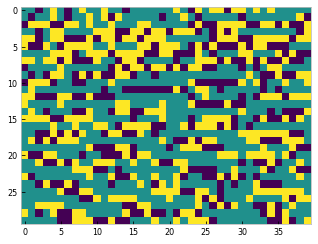

In [83]:
plt.imshow(clf.labels[-1].reshape(n,m))
plt.grid(False)

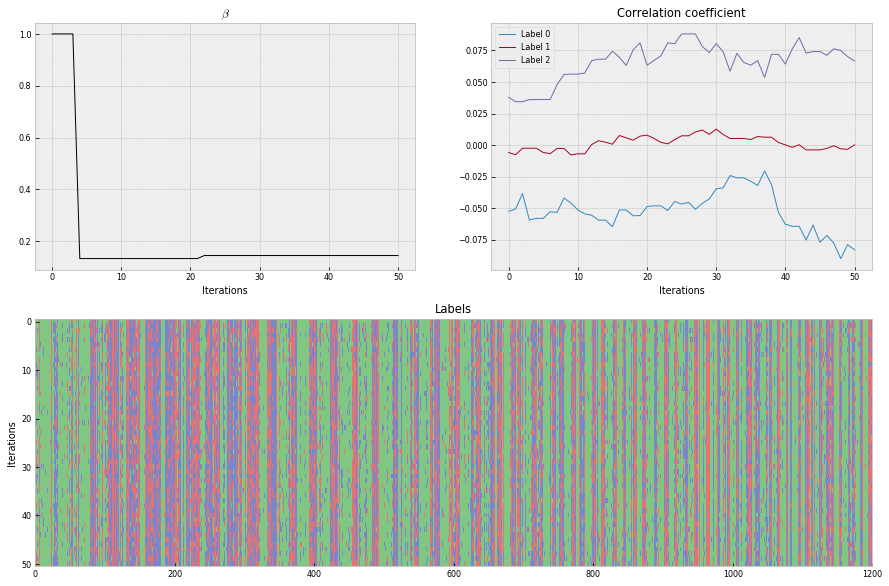

In [84]:
clf.diagnostics_plot()

In [30]:
from bayseg import pseudocolor

In [28]:
np.arange(9).reshape(3,3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [52]:
np.array(pseudocolor(coords, (4,4)))

array([[ 0,  2,  8, 10],
       [ 1,  3,  9, 11],
       [ 4,  6, 12, 14],
       [ 5,  7, 13, 15]], dtype=int64)

In [66]:
labels = np.zeros((4,4))
labels[0,:] = 1
labels[1,:] = 1
labels[:,2] = 2
labels

array([[ 1.,  1.,  2.,  1.],
       [ 1.,  1.,  2.,  1.],
       [ 0.,  0.,  2.,  0.],
       [ 0.,  0.,  2.,  0.]])

In [72]:
# beta = 1.
# 4-stamp
sol = np.array([[[ 2.,  3.,  3.,  2.],
        [ 2.,  3.,  4.,  2.], # 0
        [ 1.,  2.,  2.,  2.],
        [ 0.,  1.,  1.,  1.]],

       [[ 0.,  1.,  1.,  1.],
        [ 1.,  2.,  2.,  2.], # 1
        [ 2.,  3.,  4.,  2.],
        [ 2.,  3.,  3.,  2.]],

       [[ 2.,  2.,  2.,  1.],
        [ 3.,  3.,  2.,  2.], # 2
        [ 3.,  3.,  2.,  2.],
        [ 2.,  2.,  2.,  1.]]])

In [74]:
sol.reshape(16,3)

array([[ 2.,  3.,  3.],
       [ 2.,  2.,  3.],
       [ 4.,  2.,  1.],
       [ 2.,  2.,  2.],
       [ 0.,  1.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  1.,  1.],
       [ 2.,  2.,  2.],
       [ 2.,  3.,  4.],
       [ 2.,  2.,  3.],
       [ 3.,  2.,  2.],
       [ 2.,  2.,  1.],
       [ 3.,  3.,  2.],
       [ 2.,  3.,  3.],
       [ 2.,  2.,  2.],
       [ 2.,  2.,  1.]])

In [68]:
np.zeros((3,4,4))

array([[[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]]])

In [51]:
coords= np.indices((4,4)).reshape(16,2)

In [49]:
coords

array([[0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [2, 2],
       [2, 2],
       [3, 3],
       [3, 3],
       [0, 1],
       [2, 3],
       [0, 1],
       [2, 3],
       [0, 1],
       [2, 3],
       [0, 1],
       [2, 3]])

In [20]:
clf.coords

array([[ 0,  0],
       [ 0,  1],
       [ 0,  2],
       ..., 
       [39, 27],
       [39, 28],
       [39, 29]])

In [19]:
np.array([[0, 2, 4, 6, 8],
                    [1, 3, 5, 7, 9]]).T

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [241]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [237]:
clf.coords

array([[ 0,  0],
       [ 0,  1],
       [ 0,  2],
       ..., 
       [39, 27],
       [39, 28],
       [39, 29]])

In [234]:
clf.colors

[array([   0,    2,    4,    6,    8,   10,   12,   14,   16,   18,   20,
          22,   24,   26,   28,   60,   62,   64,   66,   68,   70,   72,
          74,   76,   78,   80,   82,   84,   86,   88,  120,  122,  124,
         126,  128,  130,  132,  134,  136,  138,  140,  142,  144,  146,
         148,  180,  182,  184,  186,  188,  190,  192,  194,  196,  198,
         200,  202,  204,  206,  208,  240,  242,  244,  246,  248,  250,
         252,  254,  256,  258,  260,  262,  264,  266,  268,  300,  302,
         304,  306,  308,  310,  312,  314,  316,  318,  320,  322,  324,
         326,  328,  360,  362,  364,  366,  368,  370,  372,  374,  376,
         378,  380,  382,  384,  386,  388,  420,  422,  424,  426,  428,
         430,  432,  434,  436,  438,  440,  442,  444,  446,  448,  480,
         482,  484,  486,  488,  490,  492,  494,  496,  498,  500,  502,
         504,  506,  508,  540,  542,  544,  546,  548,  550,  552,  554,
         556,  558,  560,  562,  564, 

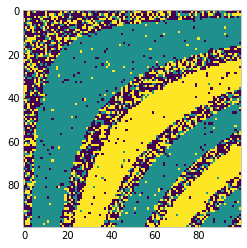

In [191]:
plt.imshow(clf.labels[-1].reshape(n,m))
plt.grid(False)

In [202]:
clf.colors

[array([   0,    2,    4, ..., 9894, 9896, 9898], dtype=int64),
 array([   1,    3,    5, ..., 9895, 9897, 9899], dtype=int64),
 array([ 100,  102,  104, ..., 9994, 9996, 9998], dtype=int64),
 array([ 101,  103,  105, ..., 9995, 9997, 9999], dtype=int64)]

In [192]:
clf.fit(100)

  0%|                                                                                       | 0/100 [00:00<?, ?it/s]..\bayseg\bayseg.py:330: RuntimeWarning: overflow encountered in exp
  acc_ratio = np.exp(log_target_prop - log_target_prev)
100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [02:20<00:00,  1.40s/it]


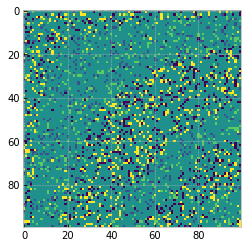

In [198]:
plt.imshow(clf.labels[51].reshape(100,100)-clf.labels[53].reshape(100,100))

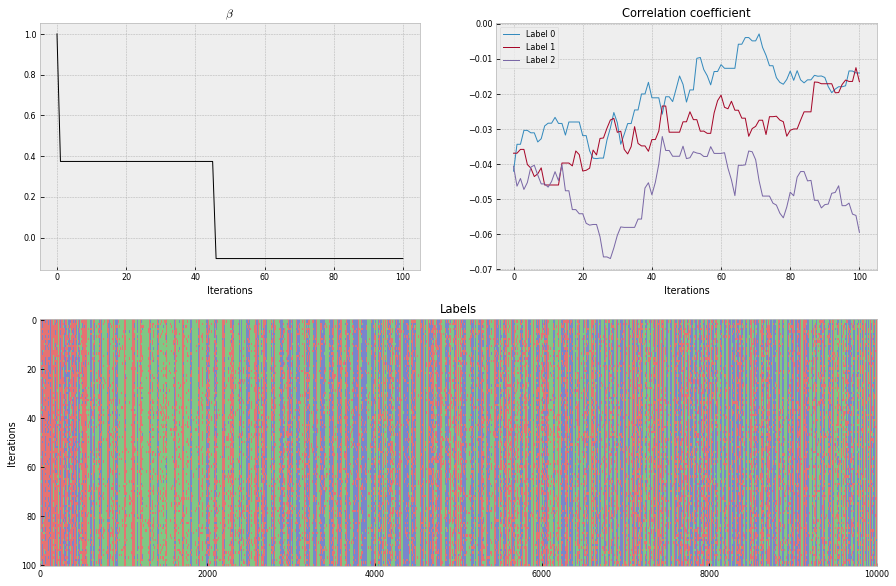

In [200]:
clf.diagnostics_plot()

In [14]:
debug

> c:\users\alexander\documents\git\bayseg\bayseg\bayseg.py(335)gibbs_sample()
    333             print("BETA acceptance ratio:", acc_ratio)
    334 
--> 335         if (acc_ratio > 1) or (np.random.uniform() < acc_ratio):
    336             self.betas.append(beta_prop)
    337         else:

ipdb> acc_ratio
array([[  8.28994330e+16,              nan,              nan,
                     nan],
       [             nan,   8.28994330e+16,              nan,
                     nan],
       [             nan,              nan,   8.28994330e+16,
                     nan],
       [             nan,              nan,              nan,
          8.28994330e+16]])
ipdb> exit


### Pseudocoloring in 2D with 4-stamp

In [12]:
e = 10

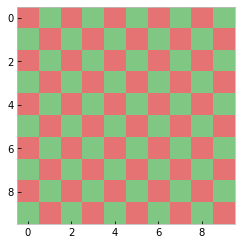

In [13]:
plt.imshow(np.tile(np.kron([[0, 1], [1, 0]] * int(e/2), np.ones((1, 1))), int(e/2)), cmap=bayseg.cmap, norm=bayseg.cmap_norm)
plt.grid(False)

### Pseudocoloring in 2D with 8-stamp

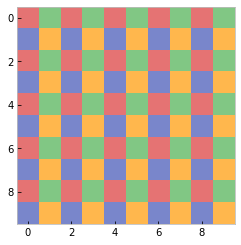

In [14]:
plt.imshow(np.tile(np.kron([[0, 1], [2, 3]] * int(e/2), np.ones((1, 1))), int(e/2)), cmap=bayseg.cmap, norm=bayseg.cmap_norm)
plt.grid(False)

In [18]:
np.shape(clf.colors)

(4, 25, 2)

### Gibbs energy calculation in 2D

In [17]:
labels = clf.labels[-1]
labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 2, 0, 2, 1], dtype=int64)

In [24]:
labels_rshp = labels.reshape(clf.shape[:-1])
labels_rshp

array([[1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 0, 0, 0, 0, 0, 2],
       [2, 2, 2, 2, 0, 0, 0, 0, 0, 2],
       [2, 2, 2, 2, 0, 0, 0, 0, 0, 2],
       [2, 2, 0, 0, 0, 0, 0, 0, 0, 2],
       [2, 1, 1, 1, 1, 1, 2, 2, 2, 2],
       [2, 2, 1, 1, 2, 1, 2, 1, 2, 2],
       [1, 0, 2, 2, 2, 2, 2, 2, 2, 2],
       [0, 2, 2, 1, 2, 2, 2, 0, 2, 1]], dtype=int64)

In [27]:
np.arange(100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [41]:
ui = np.unravel_index(np.arange(100), (10,10))
ui

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9], dtype=int64),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
        3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
        6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8,
        9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
        2, 3, 4, 5, 6, 7, 8, 9], dtype=int64))

In [42]:
np.ravel_multi_index(ui, (10,10))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], dtype=int64)

In [26]:
np.arange(100).reshape(10,10)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [167]:
labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 2, 0, 2, 1], dtype=int64)

### Flattened Stamps

In [132]:
e_x = clf.shape[0]
e_y = clf.shape[1]
# right
r = 1
# left
l = -1
# up
u = -e_x
ur = -e_x + 1
ul = -e_x - 1
# down
d = +e_x
dr = +e_x + 1
dl = +e_x -1

In [201]:
# comparison array
comparer = np.tile(np.arange(clf.n_labels), (clf.shape[0] * clf.shape[1],1))

In [207]:
comparer[:,0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [224]:
len(np.not_equal(comparer[:ul, 0], labels[-ul:]))

89

In [228]:
len(comparer[:ul, 0])

89

In [232]:
len(np.not_equal(comparer[:ul, 0], labels[-ul:]).astype(float) * beta)

89

In [233]:
len(gibbs[-ul:])

89

In [283]:
ul

-11

In [323]:
fshape = [ii for ii in fp.shape if ii > 0]

In [324]:
fshape

[3, 3]

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]], dtype=bool)

In [456]:
grid = np.ones((10,10))
grid[:,::2] = 0
#grid[::2,:] = 2
storage_grid = np.ones((10,10))
grid

array([[ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.]])

In [391]:
labels = clf.labels[-1]
labels_rshp = labels.reshape((10,10))
labels_rshp

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 1, 0, 2, 0, 0, 0],
       [2, 2, 2, 2, 1, 1, 1, 1, 1, 2],
       [2, 1, 2, 2, 1, 1, 1, 1, 1, 2],
       [2, 2, 2, 2, 1, 1, 1, 1, 1, 2],
       [2, 2, 2, 2, 1, 1, 1, 1, 1, 2],
       [2, 1, 0, 0, 0, 0, 1, 2, 2, 2],
       [2, 2, 2, 0, 0, 0, 2, 2, 1, 2],
       [2, 1, 1, 2, 2, 2, 2, 2, 2, 0],
       [2, 1, 2, 2, 2, 2, 2, 1, 2, 2]], dtype=int64)

In [428]:
comp = np.tile(np.zeros_like(labels_rshp), (3,1,1))
for l in range(clf.n_labels):
    comp[l,:,:] = l
comp

array([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],

       [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [504]:
np.not_equal?

In [527]:
np.not_equal(grid[1:-1,1:-1], grid[0:-2,1:-1])

array([[False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False]], dtype=bool)

In [528]:
np.not_equal(grid[1:-1,1:-1], grid[1:-1,0:-2])

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]], dtype=bool)

In [19]:
obs = np.ones((4, 4, 4))
clf2 = bayseg.BaySeg(obs, 3, stamp=8)

In [18]:
labels = np.array([[1., 1., 2., 1.],
                       [1., 1., 2., 1.],
                       [0., 0., 2., 0.],
                       [0., 0., 2., 0.]])

In [22]:
gibbs_energy_2d(clf2, labels, 1.)

array([[[ 1.,  1.,  1.,  1.],
        [ 1.,  4.,  4.,  1.],
        [ 0.,  0.,  4.,  0.],
        [ 0.,  0.,  1.,  0.]],

       [[ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  4.,  0.],
        [ 1.,  4.,  4.,  1.],
        [ 1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  0.,  1.],
        [ 1.,  4.,  0.,  1.],
        [ 1.,  4.,  0.,  1.],
        [ 1.,  1.,  0.,  1.]]])

In [28]:
# comparison array
comp = np.tile(np.zeros_like(labels), (3,1,1)).astype(float)

for i in range(3):
    comp[i,:,:] = i

In [29]:
comp

array([[[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]],

       [[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]],

       [[ 2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.]]])

In [33]:
labels

array([[ 1.,  1.,  2.,  1.],
       [ 1.,  1.,  2.,  1.],
       [ 0.,  0.,  2.,  0.],
       [ 0.,  0.,  2.,  0.]])

In [50]:
comp[:, :-2, 1:-1]

array([[[ 0.,  0.],
        [ 0.,  0.]],

       [[ 1.,  1.],
        [ 1.,  1.]],

       [[ 2.,  2.],
        [ 2.,  2.]]])

In [49]:
labels[1:-1, 1:-1]

array([[ 1.,  2.],
       [ 0.,  2.]])

In [53]:
 (np.not_equal(comp[:, 1:-1, 1:-1], labels[:-2, 1:-1]).astype(float) 
 + np.not_equal(comp[:, 1:-1, 1:-1], labels[2:, 1:-1]).astype(float) 
 + np.not_equal(comp[:, 1:-1, 1:-1], labels[1:-1, :-2]).astype(float) 
 + np.not_equal(comp[:, 1:-1, 1:-1], labels[1:-1, 2:]).astype(float)) * 1.

array([[[ 3.,  4.],
        [ 2.,  2.]],

       [[ 2.,  2.],
        [ 3.,  4.]],

       [[ 3.,  2.],
        [ 3.,  2.]]])

In [61]:
labels[1:,0]

array([ 1.,  0.,  0.])

In [69]:
comp[:,:,0]

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.]])

In [74]:
labels

array([[ 1.,  1.,  2.,  1.],
       [ 1.,  1.,  2.,  1.],
       [ 0.,  0.,  2.,  0.],
       [ 0.,  0.,  2.,  0.]])

In [107]:
labels[-1,-2]

2.0

[[ 1.  1.  2.  1.]
 [ 1.  1.  2.  1.]
 [ 0.  0.  2.  0.]
 [ 0.  0.  2.  0.]]
[[[ 2.  3.  3.  2.]
  [ 2.  3.  4.  2.]
  [ 1.  2.  2.  2.]
  [ 0.  1.  1.  1.]]

 [[ 0.  1.  1.  1.]
  [ 1.  2.  2.  2.]
  [ 2.  3.  4.  2.]
  [ 2.  3.  3.  2.]]

 [[ 2.  2.  2.  1.]
  [ 3.  3.  2.  2.]
  [ 3.  3.  2.  2.]
  [ 2.  2.  2.  1.]]]


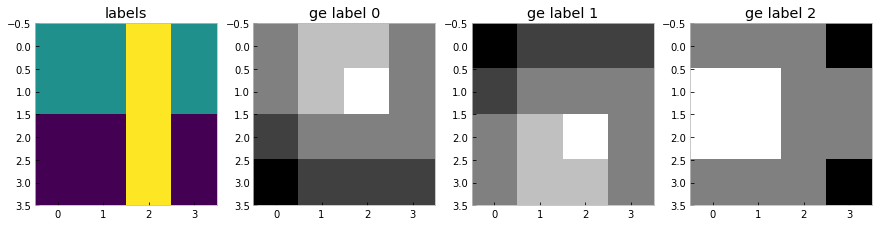

In [109]:
def gibbs_energy_2d(self, labels, beta):
    gibbs_energy = np.tile(np.zeros_like(labels).astype(float), (3,1,1))
    #print(gibbs_energy)
    
    # comparison array
    comp = np.tile(np.zeros_like(labels), (3,1,1)).astype(float)
    
    for i in range(self.n_labels):
        comp[i,:,:] = i
        
    #print(comp)
    #print(np.not_equal(labels[1:-1,1:-1], comp[:,1:-1,0:-2]).astype(float))
    # center image
    
    # above
    gibbs_energy[:,1:-1,1:-1] = (np.not_equal(comp[:, 1:-1, 1:-1], labels[:-2, 1:-1]).astype(float) 
                                + np.not_equal(comp[:, 1:-1, 1:-1], labels[2:, 1:-1]).astype(float) 
                                + np.not_equal(comp[:, 1:-1, 1:-1], labels[1:-1, :-2]).astype(float) 
                                + np.not_equal(comp[:, 1:-1, 1:-1], labels[1:-1, 2:]).astype(float)) * beta

    # left column
        # right
    gibbs_energy[:,:,0] += np.not_equal(comp[:,:,0], labels[:,1]).astype(float) * beta
        # above
    gibbs_energy[:,1:,0] += np.not_equal(comp[:,1:,0], labels[:-1,1]).astype(float) * beta  
        # below
    gibbs_energy[:,:-1,0] += np.not_equal(comp[:,:-1,0], labels[1:,1]).astype(float) * beta  
    
    # right column
        # left
    gibbs_energy[:,:,-1] += np.not_equal(comp[:,:,-1], labels[:,-2]).astype(float) * beta
        # above
    gibbs_energy[:,1:,-1] += np.not_equal(comp[:,1:,-1], labels[:-1,-1]).astype(float) * beta
        # below
    gibbs_energy[:,:-1,-1] += np.not_equal(comp[:,:-1,-1], labels[1:,-1]).astype(float) * beta
    
    # top row
        # below
    gibbs_energy[:,0,:] += np.not_equal(comp[:,0,:], labels[1,:]).astype(float) * beta
        # right
    gibbs_energy[:,0,:-1] += np.not_equal(comp[:,0,:-1], labels[0,1:]).astype(float) * beta
        # left
    gibbs_energy[:,0,1:] += np.not_equal(comp[:,0,1:], labels[0,:-1]).astype(float) * beta
    
    # bottom row
        # above
    gibbs_energy[:,-1,:] += np.not_equal(comp[:,-1,:], labels[-2,:]).astype(float) * beta
        # right
    gibbs_energy[:,-1,:-1] += np.not_equal(comp[:,-1,:-1], labels[-1,1:]).astype(float) * beta
        # left
    gibbs_energy[:,-1,1:] += np.not_equal(comp[:,-1,1:], labels[-1,:-1]).astype(float) * beta
    
    # corners redo
    # up left
    gibbs_energy[:,0,0] = (np.not_equal(comp[:,0,0], labels[1,0]).astype(float) + np.not_equal(comp[:,0,0], labels[0,1]).astype(float)) * beta
    # low left
    gibbs_energy[:,-1,0] = (np.not_equal(comp[:,-1,0], labels[-1,1]).astype(float) + np.not_equal(comp[:,-1,0], labels[-2,0]).astype(float)) * beta
    # up right
    gibbs_energy[:,0,-1] = (np.not_equal(comp[:,0,-1], labels[1,-1]).astype(float) + np.not_equal(comp[:,0,-1], labels[0,-2]).astype(float)) * beta
    # low right
    gibbs_energy[:,-1,-1] = (np.not_equal(comp[:,-1,-1], labels[-2,-1]).astype(float) + np.not_equal(comp[:,-1,-1], labels[-1,-2]).astype(float)) * beta

    return gibbs_energy

# call
test = np.eye(10,10)
test[:2] = 2
print(labels)
ge = gibbs_energy_2d(clf, labels, 1)
print(ge)
fig, ax = plt.subplots(ncols=clf.n_labels+1, figsize=(15,10))
ax[0].set_title("labels")
ax[0].imshow(labels)
ax[0].grid(False)
for i in range(clf.n_labels):
    ax[i+1].set_title("ge label "+str(i))
    ax[i+1].imshow(ge[i,:,:], cmap="gray")
    ax[i+1].grid(False)


In [597]:
test

array([[ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [35]:
import skimage.filters as filters

In [40]:
image

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

array([[2, 2, 2, 2, 1, 2, 2, 2, 2, 2],
       [2, 2, 2, 0, 1, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 2],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 0, 1, 1, 1, 1, 1, 0],
       [2, 1, 0, 0, 1, 1, 1, 1, 1, 0],
       [0, 2, 2, 2, 2, 2, 0, 2, 0, 0],
       [0, 0, 2, 0, 2, 2, 0, 2, 0, 0],
       [0, 0, 0, 2, 0, 0, 2, 0, 0, 0],
       [2, 0, 2, 0, 0, 0, 0, 0, 1, 0]], dtype=int64)

In [14]:
strct4 = np.array([[0,1,0],
                   [1,0,1],
                   [0,1,0]]).astype(bool)

strct8 = np.array([[1,1,1],
                   [1,0,1],
                   [1,1,1]]).astype(bool)

In [15]:
def f(a, value):
    # print(a)
    a = a[a != -999.]
    # print(a)
    return np.count_nonzero(a != value)

In [16]:
img = np.eye(10)

In [17]:
ge = np.tile(np.zeros_like(img), (3,1,1))
#for i in range(clf.n_labels):
#    ge[i,:,:] = i

In [18]:
from functools import partial

In [19]:
beta = 1.

In [20]:
%%timeit
for i in range(clf.n_labels):
    ge[i,:,:] = scipy.ndimage.generic_filter(img, partial(f, value=i), footprint=strct4, mode="constant", cval=-999) * beta

2.36 ms ± 45.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [30]:
clf.shape

(10, 10, 4)

In [33]:
clf.feat.shape[0]

100

In [29]:
ge.reshape(100, 3)

array([[ 0.,  2.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  2.,  0.],
       [ 2.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 2.,  0.,  2.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  2.],
       [ 0.,  2.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  2.,  0.],
       [ 2.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 2.,  0.,  2.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  2.],
       [ 0.,  2.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  2.,  0.],
       [ 2.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 2.,  0.,  2.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  2.],
       [ 0.,  2.,  1.],
       [ 3.,  3.,  3.],
       [ 3.,  3.,  3.],
       [ 3.,  2.,  1.],
       [ 4.,  2.,  4.],
       [ 4.,  4.,  4.],
       [ 4.,  4.,  3.],
       [ 3.,  2.,  4.],
       [ 2.,  4.

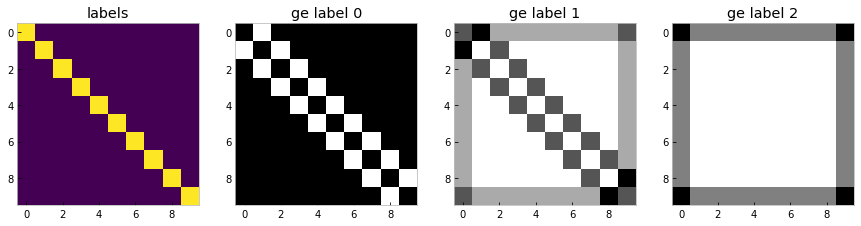

In [230]:
fig, ax = plt.subplots(ncols=clf.n_labels+1, figsize=(15,10))
ax[0].set_title("labels")
ax[0].imshow(img)
ax[0].grid(False)
for i in range(clf.n_labels):
    ax[i+1].set_title("ge label "+str(i))
    ax[i+1].imshow(ge[i,:,:], cmap="gray")
    ax[i+1].grid(False)

In [146]:
scipy.ndimage.generic_filter?

In [80]:
image

array([[2, 2, 2, 2, 1, 2, 2, 2, 2, 2],
       [2, 2, 2, 0, 1, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 2],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 0, 1, 1, 1, 1, 1, 0],
       [2, 1, 0, 0, 1, 1, 1, 1, 1, 0],
       [0, 2, 2, 2, 2, 2, 0, 2, 0, 0],
       [0, 0, 2, 0, 2, 2, 0, 2, 0, 0],
       [0, 0, 0, 2, 0, 0, 2, 0, 0, 0],
       [2, 0, 2, 0, 0, 0, 0, 0, 1, 0]], dtype=int64)

In [34]:
import numpy as np
from skimage import util

image = np.eye(10)

windows = util.view_as_windows(image, (3, 3))
windows

array([[[[ 1.,  0.,  0.],
         [ 0.,  1.,  0.],
         [ 0.,  0.,  1.]],

        [[ 0.,  0.,  0.],
         [ 1.,  0.,  0.],
         [ 0.,  1.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 1.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]]],


       [[[ 0.,  1.,  0.],
         [ 0.,  0.,  1.],
         [ 0.,  0.,  0.]],

        [[ 1.,  0.,  0.],
         [ 0.,  1.,  0.],
         [ 0.,  0.,  1.]],

        [[ 0.,  0.,  0.],
         [ 1.,  0.,  0.],
         [ 0.,  1.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 1.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0